In [1]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from lineage import get_lineage_coll, get_lineage_snp
from resistance import get_resistance_snp

In [39]:
def import_VCF42_to_pandas(vcf_file, sep='\t'):
    header_lines = 0
    with open(vcf_file) as f:
        first_line = f.readline().strip()
        next_line = f.readline().strip()
        while next_line.startswith("##"):
            header_lines = header_lines + 1
            #print(next_line)
            next_line = f.readline()
    
    if first_line.endswith('VCFv4.2'):
        
        #Use first line as header
        dataframe = pd.read_csv(vcf_file, sep=sep, skiprows=[header_lines], header=header_lines)
        sample = dataframe.columns[-1]
        dataframe.rename(columns={sample:'sample'}, inplace=True)
        
        for index in dataframe.index:
            info_fields = re.findall(r';*([a-zA-Z]{1,20})=', dataframe.loc[index,'INFO'])
            info_values = re.findall(r'-?\d+\.?\d*e?[+-]?\d{0,2}', dataframe.loc[index,'INFO'])
            
            format_fields = dataframe.loc[index,'FORMAT'].split(":")
            format_values = dataframe.loc[index,'sample'].split(":")
                                    
            for ifield, ivalue in zip(info_fields,info_values):
                dataframe.loc[index,ifield] = ivalue
                
            for ffield, fvalue in zip(format_fields,format_values):
                dataframe.loc[index,ffield] = fvalue
            #if len(format_values[1].split(",")) != 2:
            #    print(format_values[1].split(","), index)
            #    print(dataframe.iloc[index])
        dataframe.rename(columns={'AF':'af'}, inplace=True)
        dataframe['REF_AD'] = dataframe['AD'].str.split(",").str[-2:].str[0]
        dataframe['ALT_AD'] = dataframe['AD'].str.split(",").str[-2:].str[1]
        
        to_float = ['QUAL', 'AC', 'af', 'AN', 'BaseQRankSum', 'DP', 'ExcessHet', 'FS',
       'MLEAC', 'MLEAF', 'MQ', 'MQRankSum', 'QD', 'ReadPosRankSum', 'SOR','GQ','ALT_AD', 'REF_AD']
        
        to_int = ['POS']
        
        for column in dataframe.columns:
            if column in to_float:
                dataframe[column] = dataframe[column].astype(float)
                
        for column in dataframe.columns:
            if column in to_int:
                dataframe[column] = dataframe[column].astype(int)
        
        dataframe['aF'] = dataframe['REF_AD']/(dataframe['REF_AD'] + dataframe['ALT_AD'])
        dataframe['AF'] = dataframe['ALT_AD']/(dataframe['REF_AD'] + dataframe['ALT_AD'])

                
    else:
        print("This vcf file is not v4.2")
        sys.exit(1)
           
    return dataframe

In [40]:
vcf_1 = 'test/1mixed.snp.hf.vcf'
vcf_2 = 'test/2mixed.snp.hf.vcf'
vcf_3 = 'test/3mixed.snp.hf.vcf'
vcf_4 = 'test/4mixed.snp.hf.vcf'
vcf_5 = 'test/5mixed.snp.hf.vcf'
vcf_6 = 'test/6mixed.snp.hf.vcf'
vcf_files = [vcf_1, vcf_2, vcf_3, vcf_4, vcf_5, vcf_6]

#reference="data/MTB_ancestorII_reference.fas"

#fasta_to_replace = SeqIO.read(reference,"fasta")

sample_list = ["1", "2", "3", "4", "5", "6"]
sample_list_df_name = [sample + "_df" for sample in sample_list]

dict_df = {}
for vcf, df_name in zip(vcf_files, sample_list_df_name):
    dict_df[df_name] = import_VCF42_to_pandas(vcf)
    
#P150_df = import_VCF4_to_pandas(vcf_P150)
#P180_df = import_VCF4_to_pandas(vcf_P180)
#P190_df = import_VCF4_to_pandas(vcf_P190)


#new_reference_seq = replace_fasta_sequence(reference,P150_df['REF'],P150_df['ALT'],P150_df['POS'])
#new_reference_id = "%s_%s" % (fasta_to_replace.id, sample_name)

#Output_new_reference = "Ancestor_PAIR15050.fasta"

#Create seqIO object
#new_reference = SeqRecord(Seq(new_reference_seq), id = new_reference_id, description = "")


#with open(Output_new_reference, "w") as output_handle:
#    SeqIO.write(new_reference, output_handle, "fasta")
#df_1 = import_VCF4_to_pandas(vcf_1)

In [4]:
print(sample_list_df_name)
print(vcf_files)

['1_df', '2_df', '3_df', '4_df', '5_df', '6_df']
['test/1mixed.snp.hf.vcf', 'test/2mixed.snp.hf.vcf', 'test/3mixed.snp.hf.vcf', 'test/4mixed.snp.hf.vcf', 'test/5mixed.snp.hf.vcf', 'test/6mixed.snp.hf.vcf']


In [5]:
#print(fasta_to_replace.seq[0:41])

In [6]:
isoniazid = [1673423,
1673424,
1673425,
1673432,
1673432,
1674481,
1674782,
2102240,
2102715,
2155167,
2155167,
2155168,
2155168,
2155169,
2155206,
2155212,
2155214,
2155222,
2155289,
2155699,
2726136,
2726145]


In [7]:
#print(new_reference_seq[0:41])

In [8]:
dict_df["3_df"][dict_df["3_df"]['POS'] == 2155167]

Empty DataFrame
Columns: [#CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT, sample, AC, af, AN, BaseQRankSum, DP, ExcessHet, FS, MLEAC, MLEAF, MQ, MQRankSum, QD, ReadPosRankSum, SOR, GT, AD, GQ, PL, PGT, PID, PS, REF_AD, ALT_AD, aF, AF]
Index: []

[0 rows x 35 columns]

In [13]:
dict_df["3_df"][dict_df["3_df"]['POS'].isin(isoniazid)]

#CHROM      POS ID REF ALT   QUAL FILTER  \
1254  MTB_anc  2155168  .   C   G  392.6   PASS   

                                                   INFO          FORMAT  \
1254  AC=1;AF=0.500;AN=2;BaseQRankSum=0.891;DP=135;E...  GT:AD:DP:GQ:PL   

                            sample  ...      AD    GQ          PL  PGT  PID  \
1254  0/1:110,25:135:99:400,0,2960  ...  110,25  99.0  400,0,2960  NaN  NaN   

       PS  REF_AD  ALT_AD        aF        AF  
1254  NaN   110.0    25.0  0.814815  0.185185  

[1 rows x 35 columns]

In [14]:
dict_df["1_df"].dtypes

#CHROM             object
POS                 int64
ID                 object
REF                object
ALT                object
QUAL              float64
FILTER             object
INFO               object
FORMAT             object
sample             object
AC                float64
af                float64
AN                float64
DP                float64
ExcessHet         float64
FS                float64
MLEAC             float64
MLEAF             float64
MQ                float64
QD                float64
SOR               float64
GT                 object
AD                 object
GQ                float64
PL                 object
BaseQRankSum      float64
MQRankSum         float64
ReadPosRankSum    float64
PGT                object
PID                object
PS                 object
REF_AD            float64
ALT_AD            float64
aF                float64
AF                float64
dtype: object

In [15]:
dict_df["1_df"].head(5)

#CHROM   POS ID REF ALT     QUAL FILTER  \
0  MTB_anc  2532  .   C   T   921.03   PASS   
1  MTB_anc  8049  .   T   G  1319.60   PASS   
2  MTB_anc  8688  .   G   T   784.60   PASS   
3  MTB_anc  9143  .   C   T  3478.03   PASS   
4  MTB_anc  9841  .   C   T  1034.60   PASS   

                                                INFO          FORMAT  \
0  AC=2;AF=1.00;AN=2;DP=29;ExcessHet=3.0103;FS=0....  GT:AD:DP:GQ:PL   
1  AC=1;AF=0.500;AN=2;BaseQRankSum=0.873;DP=74;Ex...  GT:AD:DP:GQ:PL   
2  AC=1;AF=0.500;AN=2;BaseQRankSum=1.87;DP=73;Exc...  GT:AD:DP:GQ:PL   
3  AC=2;AF=1.00;AN=2;DP=106;ExcessHet=3.0103;FS=0...  GT:AD:DP:GQ:PL   
4  AC=1;AF=0.500;AN=2;BaseQRankSum=0.148;DP=121;E...  GT:AD:DP:GQ:PL   

                         sample  ...  BaseQRankSum  MQRankSum  ReadPosRankSum  \
0       1/1:0,29:29:87:935,87,0  ...           NaN        NaN             NaN   
1    0/1:30,44:74:99:1327,0,793  ...         0.873        0.0          -0.149   
2    0/1:45,28:73:99:792,0,1301  ...         1.870        0.0          -0.562   
3   1/1:0,106:106:99:3492,318,0  ...           NaN        NaN             NaN   
4  0/1:77,44:121:99:1042,0,2063  ...         0.148        0.0          -1.976   

   PGT  PID   PS  REF_AD  ALT_AD        aF        AF  
0  NaN  NaN  NaN     0.0    29.0  0.000000  1.000000  
1  NaN  NaN  NaN    30.0    44.0  0.405405  0.594595  
2  NaN  NaN  NaN    45.0    28.0  0.616438  0.383562  
3  NaN  NaN  NaN     0.0   106.0  0.000000  1.000000  
4  NaN  NaN  NaN    77.0    44.0  0.636364  0.363636  

[5 rows x 35 columns]

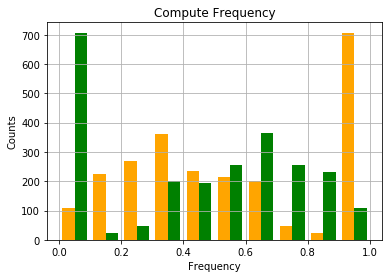

In [16]:
x = dict_df["1_df"]['AF']
reference = 1 - dict_df["1_df"]['AF']

plt.xlabel('Frequency')
plt.ylabel('Counts')
plt.title('Compute Frequency')
plt.grid(True)

plt.hist([x, reference], color=['orange', 'green']) 
plt.show()

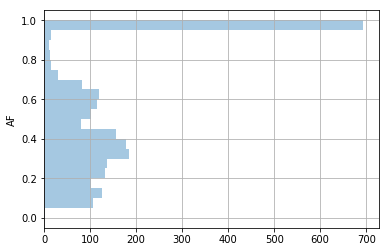

In [17]:
x = dict_df["1_df"]['AF']
espejo = 1 - dict_df["1_df"]['AF']

sns.distplot(x, kde=False, rug=False, bins=int(20), vertical=True)
plt.grid(True)
#sns.distplot(espejo, kde=False, rug=False)

In [18]:
dict_df["1_df"]['AF'].mean(axis = 0) 

0.5623748434941688

In [19]:
def scatter_vcf(vcf_df):
    filter_value = 0.98
    y = vcf_df['AF'][vcf_df['AF'] < filter_value]
    x = vcf_df['AF'][vcf_df['AF'] < filter_value].index.values
    
    mean = vcf_df['AF'].mean(axis = 0)
    
    col_mean = np.where(vcf_df['AF'][vcf_df['AF'] < filter_value] > mean,'c','r')
    
    plt.figure(figsize=(50,20))
    plt.margins(x=0.01, y=0.01, tight=True)

    plt.xlabel('Frequency')
    plt.ylabel('Counts')
    plt.title('Compute Frequency')
    plt.grid(True)
    

    plt.scatter(x, y, color=col_mean, alpha=0.9, s=200) # colormap='jet'
    plt.show()
    

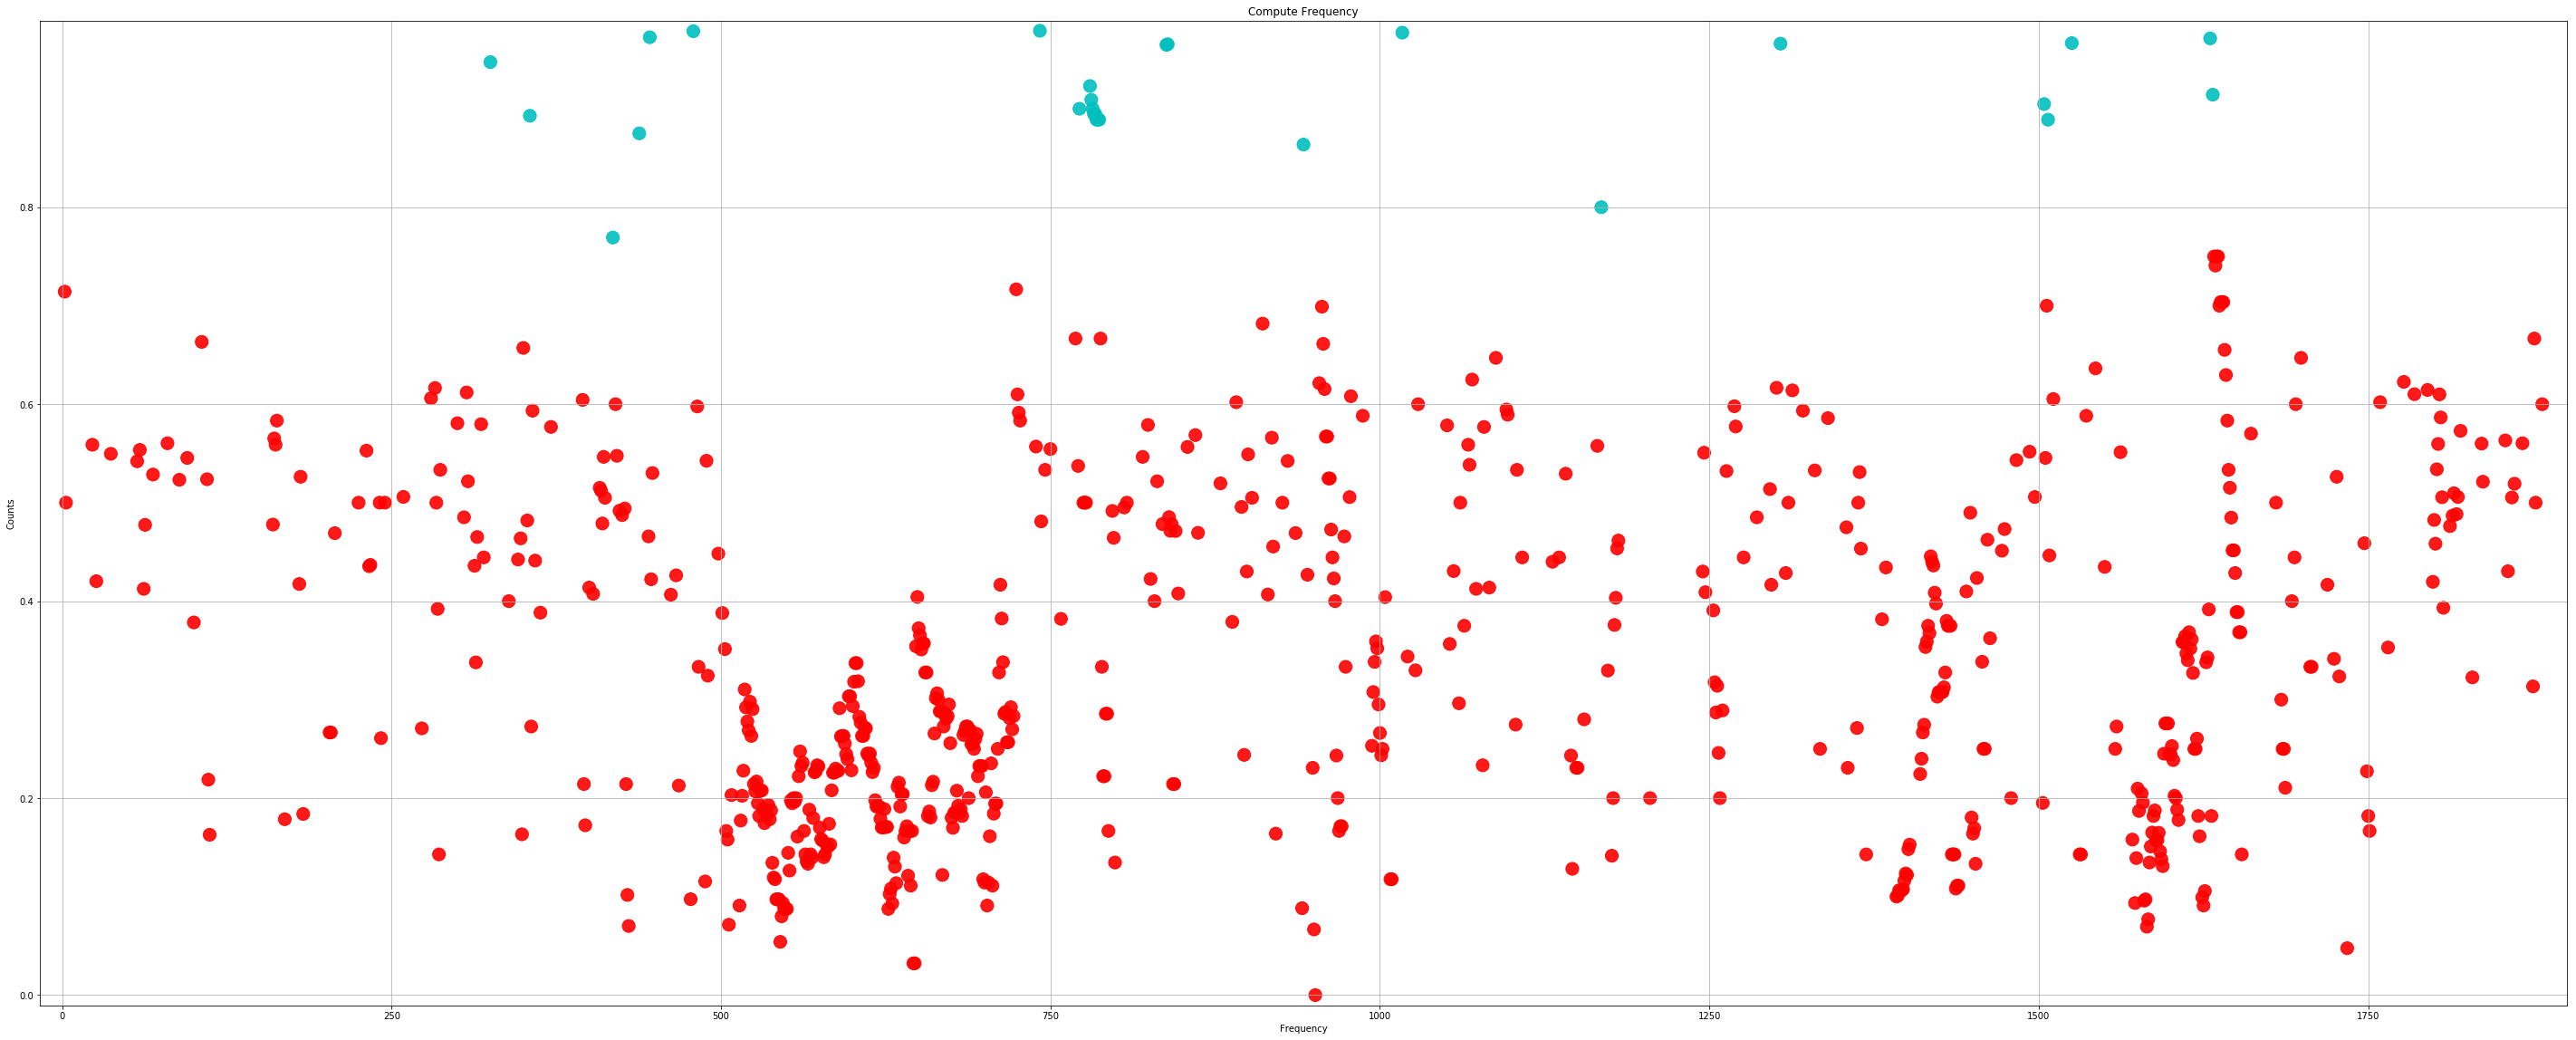

In [20]:
scatter_vcf(dict_df["5_df"])

# FILTER REPEATS

In [21]:
list_positions = []
with open("data/repeats_annot.coords.tab") as f:
    for _ in range(1):
        next(f)
    for line in f:
        split_line = line.strip().split("\t")
        expression = "((row['POS'] >= %s) & (row['POS'] <= %s))" % (split_line[0], split_line[1])
        list_positions.append(expression)
print("(" + "|".join(list_positions) + ")")

(((row['POS'] >= 33582 ) & (row['POS'] <=  33794))|((row['POS'] >= 103710 ) & (row['POS'] <=  104663))|((row['POS'] >= 104805 ) & (row['POS'] <=  105215))|((row['POS'] >= 105324 ) & (row['POS'] <=  106715))|((row['POS'] >= 131382 ) & (row['POS'] <=  132872))|((row['POS'] >= 149533 ) & (row['POS'] <=  150996))|((row['POS'] >= 177543 ) & (row['POS'] <=  179309))|((row['POS'] >= 179319 ) & (row['POS'] <=  180896))|((row['POS'] >= 187433 ) & (row['POS'] <=  188839))|((row['POS'] >= 188931 ) & (row['POS'] <=  190439))|((row['POS'] >= 307877 ) & (row['POS'] <=  309547))|((row['POS'] >= 333437 ) & (row['POS'] <=  336310))|((row['POS'] >= 336560 ) & (row['POS'] <=  339073))|((row['POS'] >= 339364 ) & (row['POS'] <=  340974))|((row['POS'] >= 349624 ) & (row['POS'] <=  349932))|((row['POS'] >= 349935 ) & (row['POS'] <=  351476))|((row['POS'] >= 361334 ) & (row['POS'] <=  363109))|((row['POS'] >= 366150 ) & (row['POS'] <=  372764))|((row['POS'] >= 372820 ) & (row['POS'] <=  375711))|((row['POS'] 

In [22]:
def filter_repeats(row):
    if ((row['POS'] >= 33582 ) & (row['POS'] <=  33794))|((row['POS'] >= 103710 ) & (row['POS'] <=  104663))|((row['POS'] >= 104805 ) & (row['POS'] <=  105215))|((row['POS'] >= 105324 ) & (row['POS'] <=  106715))|((row['POS'] >= 131382 ) & (row['POS'] <=  132872))|((row['POS'] >= 149533 ) & (row['POS'] <=  150996))|((row['POS'] >= 177543 ) & (row['POS'] <=  179309))|((row['POS'] >= 179319 ) & (row['POS'] <=  180896))|((row['POS'] >= 187433 ) & (row['POS'] <=  188839))|((row['POS'] >= 188931 ) & (row['POS'] <=  190439))|((row['POS'] >= 307877 ) & (row['POS'] <=  309547))|((row['POS'] >= 333437 ) & (row['POS'] <=  336310))|((row['POS'] >= 336560 ) & (row['POS'] <=  339073))|((row['POS'] >= 339364 ) & (row['POS'] <=  340974))|((row['POS'] >= 349624 ) & (row['POS'] <=  349932))|((row['POS'] >= 349935 ) & (row['POS'] <=  351476))|((row['POS'] >= 361334 ) & (row['POS'] <=  363109))|((row['POS'] >= 366150 ) & (row['POS'] <=  372764))|((row['POS'] >= 372820 ) & (row['POS'] <=  375711))|((row['POS'] >= 399535 ) & (row['POS'] <=  400050))|((row['POS'] >= 400192 ) & (row['POS'] <=  401703))|((row['POS'] >= 424269 ) & (row['POS'] <=  424694))|((row['POS'] >= 424777 ) & (row['POS'] <=  434679))|((row['POS'] >= 466672 ) & (row['POS'] <=  467406))|((row['POS'] >= 467459 ) & (row['POS'] <=  468001))|((row['POS'] >= 472781 ) & (row['POS'] <=  474106))|((row['POS'] >= 475816 ) & (row['POS'] <=  476184))|((row['POS'] >= 530751 ) & (row['POS'] <=  532214))|((row['POS'] >= 543174 ) & (row['POS'] <=  544730))|((row['POS'] >= 606551 ) & (row['POS'] <=  608062))|((row['POS'] >= 622793 ) & (row['POS'] <=  624577))|((row['POS'] >= 671996 ) & (row['POS'] <=  675916))|((row['POS'] >= 832534 ) & (row['POS'] <=  832848))|((row['POS'] >= 832981 ) & (row['POS'] <=  833508))|((row['POS'] >= 835701 ) & (row['POS'] <=  838052))|((row['POS'] >= 838451 ) & (row['POS'] <=  840856))|((row['POS'] >= 846159 ) & (row['POS'] <=  847913))|((row['POS'] >= 848103 ) & (row['POS'] <=  850040))|((row['POS'] >= 850342 ) & (row['POS'] <=  850527))|((row['POS'] >= 889072 ) & (row['POS'] <=  889398))|((row['POS'] >= 889395 ) & (row['POS'] <=  890333))|((row['POS'] >= 890388 ) & (row['POS'] <=  891482))|((row['POS'] >= 924951 ) & (row['POS'] <=  925364))|((row['POS'] >= 925361 ) & (row['POS'] <=  927610))|((row['POS'] >= 927837 ) & (row['POS'] <=  930485))|((row['POS'] >= 947312 ) & (row['POS'] <=  947644))|((row['POS'] >= 968424 ) & (row['POS'] <=  970244))|((row['POS'] >= 976872 ) & (row['POS'] <=  978203))|((row['POS'] >= 1020058 ) & (row['POS'] <=  1021329))|((row['POS'] >= 1021344 ) & (row['POS'] <=  1021643))|((row['POS'] >= 1025497 ) & (row['POS'] <=  1026816))|((row['POS'] >= 1027104 ) & (row['POS'] <=  1027685))|((row['POS'] >= 1027685 ) & (row['POS'] <=  1029337))|((row['POS'] >= 1090373 ) & (row['POS'] <=  1093144))|((row['POS'] >= 1093361 ) & (row['POS'] <=  1094356))|((row['POS'] >= 1095078 ) & (row['POS'] <=  1096451))|((row['POS'] >= 1158918 ) & (row['POS'] <=  1159307))|((row['POS'] >= 1159375 ) & (row['POS'] <=  1160061))|((row['POS'] >= 1161297 ) & (row['POS'] <=  1162472))|((row['POS'] >= 1162549 ) & (row['POS'] <=  1163376))|((row['POS'] >= 1164572 ) & (row['POS'] <=  1165435))|((row['POS'] >= 1165092 ) & (row['POS'] <=  1165499))|((row['POS'] >= 1169423 ) & (row['POS'] <=  1170670))|((row['POS'] >= 1176928 ) & (row['POS'] <=  1177242))|((row['POS'] >= 1188421 ) & (row['POS'] <=  1190424))|((row['POS'] >= 1190757 ) & (row['POS'] <=  1192148))|((row['POS'] >= 1211560 ) & (row['POS'] <=  1213863))|((row['POS'] >= 1214513 ) & (row['POS'] <=  1214947))|((row['POS'] >= 1214769 ) & (row['POS'] <=  1215131))|((row['POS'] >= 1216469 ) & (row['POS'] <=  1219030))|((row['POS'] >= 1251617 ) & (row['POS'] <=  1252972))|((row['POS'] >= 1262272 ) & (row['POS'] <=  1264128))|((row['POS'] >= 1276300 ) & (row['POS'] <=  1277748))|((row['POS'] >= 1277893 ) & (row['POS'] <=  1278300))|((row['POS'] >= 1298764 ) & (row['POS'] <=  1299804))|((row['POS'] >= 1299822 ) & (row['POS'] <=  1300124))|((row['POS'] >= 1301755 ) & (row['POS'] <=  1302681))|((row['POS'] >= 1339003 ) & (row['POS'] <=  1339302))|((row['POS'] >= 1339349 ) & (row['POS'] <=  1340524))|((row['POS'] >= 1341358 ) & (row['POS'] <=  1342605))|((row['POS'] >= 1357293 ) & (row['POS'] <=  1357625))|((row['POS'] >= 1384989 ) & (row['POS'] <=  1386677))|((row['POS'] >= 1468171 ) & (row['POS'] <=  1469505))|((row['POS'] >= 1488154 ) & (row['POS'] <=  1489965))|((row['POS'] >= 1532443 ) & (row['POS'] <=  1533633))|((row['POS'] >= 1541994 ) & (row['POS'] <=  1542878))|((row['POS'] >= 1542929 ) & (row['POS'] <=  1543255))|((row['POS'] >= 1561464 ) & (row['POS'] <=  1561772))|((row['POS'] >= 1561769 ) & (row['POS'] <=  1563388))|((row['POS'] >= 1572127 ) & (row['POS'] <=  1573857))|((row['POS'] >= 1606386 ) & (row['POS'] <=  1607972))|((row['POS'] >= 1618209 ) & (row['POS'] <=  1619684))|((row['POS'] >= 1630638 ) & (row['POS'] <=  1634627))|((row['POS'] >= 1636004 ) & (row['POS'] <=  1638229))|((row['POS'] >= 1655609 ) & (row['POS'] <=  1656721))|((row['POS'] >= 1751297 ) & (row['POS'] <=  1753333))|((row['POS'] >= 1779194 ) & (row['POS'] <=  1779298))|((row['POS'] >= 1779314 ) & (row['POS'] <=  1779724))|((row['POS'] >= 1779930 ) & (row['POS'] <=  1780241))|((row['POS'] >= 1780199 ) & (row['POS'] <=  1780699))|((row['POS'] >= 1780643 ) & (row['POS'] <=  1782064))|((row['POS'] >= 1782072 ) & (row['POS'] <=  1782584))|((row['POS'] >= 1782758 ) & (row['POS'] <=  1783228))|((row['POS'] >= 1783309 ) & (row['POS'] <=  1783623))|((row['POS'] >= 1783620 ) & (row['POS'] <=  1783892))|((row['POS'] >= 1783906 ) & (row['POS'] <=  1784301))|((row['POS'] >= 1784497 ) & (row['POS'] <=  1785912))|((row['POS'] >= 1785912 ) & (row['POS'] <=  1786310))|((row['POS'] >= 1786307 ) & (row['POS'] <=  1786528))|((row['POS'] >= 1786584 ) & (row['POS'] <=  1787099))|((row['POS'] >= 1787096 ) & (row['POS'] <=  1788505))|((row['POS'] >= 1788162 ) & (row['POS'] <=  1789163))|((row['POS'] >= 1789168 ) & (row['POS'] <=  1789836))|((row['POS'] >= 1855764 ) & (row['POS'] <=  1856696))|((row['POS'] >= 1862347 ) & (row['POS'] <=  1865382))|((row['POS'] >= 1931497 ) & (row['POS'] <=  1932654))|((row['POS'] >= 1932694 ) & (row['POS'] <=  1933878))|((row['POS'] >= 1981614 ) & (row['POS'] <=  1984775))|((row['POS'] >= 1987745 ) & (row['POS'] <=  1988629))|((row['POS'] >= 1988680 ) & (row['POS'] <=  1989006))|((row['POS'] >= 1989833 ) & (row['POS'] <=  1992577))|((row['POS'] >= 1996152 ) & (row['POS'] <=  1996478))|((row['POS'] >= 1996529 ) & (row['POS'] <=  1997413))|((row['POS'] >= 1999142 ) & (row['POS'] <=  1999357)):
        return True
    elif ((row['POS'] >= 2000614 ) & (row['POS'] <=  2002470))|((row['POS'] >= 2025301 ) & (row['POS'] <=  2026398))|((row['POS'] >= 2026477 ) & (row['POS'] <=  2026776))|((row['POS'] >= 2026790 ) & (row['POS'] <=  2027971))|((row['POS'] >= 2028425 ) & (row['POS'] <=  2029477))|((row['POS'] >= 2029904 ) & (row['POS'] <=  2030203))|((row['POS'] >= 2039453 ) & (row['POS'] <=  2041420))|((row['POS'] >= 2042001 ) & (row['POS'] <=  2043272))|((row['POS'] >= 2043384 ) & (row['POS'] <=  2044775))|((row['POS'] >= 2044923 ) & (row['POS'] <=  2046842))|((row['POS'] >= 2048072 ) & (row['POS'] <=  2048371))|((row['POS'] >= 2048398 ) & (row['POS'] <=  2049597))|((row['POS'] >= 2049921 ) & (row['POS'] <=  2051150))|((row['POS'] >= 2051282 ) & (row['POS'] <=  2052688))|((row['POS'] >= 2061178 ) & (row['POS'] <=  2062674))|((row['POS'] >= 2087971 ) & (row['POS'] <=  2089518))|((row['POS'] >= 2162932 ) & (row['POS'] <=  2167311))|((row['POS'] >= 2167649 ) & (row['POS'] <=  2170612))|((row['POS'] >= 2195989 ) & (row['POS'] <=  2197353))|((row['POS'] >= 2226244 ) & (row['POS'] <=  2227920))|((row['POS'] >= 2260665 ) & (row['POS'] <=  2261144))|((row['POS'] >= 2261098 ) & (row['POS'] <=  2261688))|((row['POS'] >= 2358389 ) & (row['POS'] <=  2360041))|((row['POS'] >= 2365465 ) & (row['POS'] <=  2365791))|((row['POS'] >= 2365788 ) & (row['POS'] <=  2366726))|((row['POS'] >= 2367359 ) & (row['POS'] <=  2367655))|((row['POS'] >= 2367711 ) & (row['POS'] <=  2368442))|((row['POS'] >= 2381071 ) & (row['POS'] <=  2382492))|((row['POS'] >= 2387202 ) & (row['POS'] <=  2387972))|((row['POS'] >= 2423240 ) & (row['POS'] <=  2424838))|((row['POS'] >= 2430159 ) & (row['POS'] <=  2431199))|((row['POS'] >= 2431094 ) & (row['POS'] <=  2431420))|((row['POS'] >= 2439282 ) & (row['POS'] <=  2439947))|((row['POS'] >= 2550065 ) & (row['POS'] <=  2550391))|((row['POS'] >= 2550388 ) & (row['POS'] <=  2551326))|((row['POS'] >= 2600731 ) & (row['POS'] <=  2601879))|((row['POS'] >= 2617667 ) & (row['POS'] <=  2618908))|((row['POS'] >= 2632923 ) & (row['POS'] <=  2634098))|((row['POS'] >= 2634528 ) & (row['POS'] <=  2635592))|((row['POS'] >= 2635628 ) & (row['POS'] <=  2635954))|((row['POS'] >= 2635951 ) & (row['POS'] <=  2636889))|((row['POS'] >= 2637688 ) & (row['POS'] <=  2639535))|((row['POS'] >= 2651753 ) & (row['POS'] <=  2651938))|((row['POS'] >= 2692799 ) & (row['POS'] <=  2693884))|((row['POS'] >= 2706017 ) & (row['POS'] <=  2706736))|((row['POS'] >= 2720776 ) & (row['POS'] <=  2721777))|((row['POS'] >= 2727336 ) & (row['POS'] <=  2727920))|((row['POS'] >= 2727967 ) & (row['POS'] <=  2728266))|((row['POS'] >= 2784657 ) & (row['POS'] <=  2785697))|((row['POS'] >= 2785592 ) & (row['POS'] <=  2785918))|((row['POS'] >= 2795301 ) & (row['POS'] <=  2797385))|((row['POS'] >= 2801254 ) & (row['POS'] <=  2806236))|((row['POS'] >= 2828556 ) & (row['POS'] <=  2829803))|((row['POS'] >= 2835785 ) & (row['POS'] <=  2837263))|((row['POS'] >= 2921551 ) & (row['POS'] <=  2923182))|((row['POS'] >= 2935046 ) & (row['POS'] <=  2936788))|((row['POS'] >= 2943600 ) & (row['POS'] <=  2944985))|((row['POS'] >= 2960105 ) & (row['POS'] <=  2962441))|((row['POS'] >= 2970551 ) & (row['POS'] <=  2971549))|((row['POS'] >= 2972160 ) & (row['POS'] <=  2972486))|((row['POS'] >= 2972435 ) & (row['POS'] <=  2973421))|((row['POS'] >= 2973795 ) & (row['POS'] <=  2975234))|((row['POS'] >= 2975242 ) & (row['POS'] <=  2975775))|((row['POS'] >= 2975928 ) & (row['POS'] <=  2976554))|((row['POS'] >= 2976586 ) & (row['POS'] <=  2976909))|((row['POS'] >= 2976989 ) & (row['POS'] <=  2977234))|((row['POS'] >= 2977231 ) & (row['POS'] <=  2978658))|((row['POS'] >= 2978660 ) & (row['POS'] <=  2979052))|((row['POS'] >= 2979049 ) & (row['POS'] <=  2979309))|((row['POS'] >= 2979326 ) & (row['POS'] <=  2979688))|((row['POS'] >= 2979691 ) & (row['POS'] <=  2980818))|((row['POS'] >= 2983071 ) & (row['POS'] <=  2983874))|((row['POS'] >= 3053914 ) & (row['POS'] <=  3055491))|((row['POS'] >= 3076894 ) & (row['POS'] <=  3078078))|((row['POS'] >= 3078158 ) & (row['POS'] <=  3078985))|((row['POS'] >= 3079309 ) & (row['POS'] <=  3080457))|((row['POS'] >= 3100202 ) & (row['POS'] <=  3101581))|((row['POS'] >= 3115741 ) & (row['POS'] <=  3116142))|((row['POS'] >= 3116818 ) & (row['POS'] <=  3118227))|((row['POS'] >= 3120566 ) & (row['POS'] <=  3121504))|((row['POS'] >= 3121501 ) & (row['POS'] <=  3121827))|((row['POS'] >= 3162268 ) & (row['POS'] <=  3164115))|((row['POS'] >= 3194166 ) & (row['POS'] <=  3195548))|((row['POS'] >= 3200794 ) & (row['POS'] <=  3202020))|((row['POS'] >= 3288464 ) & (row['POS'] <=  3289705))|((row['POS'] >= 3289705 ) & (row['POS'] <=  3290235))|((row['POS'] >= 3289790 ) & (row['POS'] <=  3290506))|((row['POS'] >= 3313283 ) & (row['POS'] <=  3313672))|((row['POS'] >= 3333785 ) & (row['POS'] <=  3335164))|((row['POS'] >= 3376939 ) & (row['POS'] <=  3378243))|((row['POS'] >= 3378329 ) & (row['POS'] <=  3378415))|((row['POS'] >= 3379376 ) & (row['POS'] <=  3380452))|((row['POS'] >= 3380440 ) & (row['POS'] <=  3380682))|((row['POS'] >= 3380679 ) & (row['POS'] <=  3380993))|((row['POS'] >= 3381375 ) & (row['POS'] <=  3382622))|((row['POS'] >= 3465778 ) & (row['POS'] <=  3467091))|((row['POS'] >= 3481451 ) & (row['POS'] <=  3482698))|((row['POS'] >= 3490476 ) & (row['POS'] <=  3491651))|((row['POS'] >= 3501334 ) & (row['POS'] <=  3501732))|((row['POS'] >= 3501794 ) & (row['POS'] <=  3502936))|((row['POS'] >= 3510088 ) & (row['POS'] <=  3511317))|((row['POS'] >= 3527391 ) & (row['POS'] <=  3529163))|((row['POS'] >= 3551281 ) & (row['POS'] <=  3551607))|((row['POS'] >= 3551604 ) & (row['POS'] <=  3552542))|((row['POS'] >= 3552764 ) & (row['POS'] <=  3553090))|((row['POS'] >= 3553087 ) & (row['POS'] <=  3554025))|((row['POS'] >= 3557311 ) & (row['POS'] <=  3558345))|((row['POS'] >= 3710433 ) & (row['POS'] <=  3710759))|((row['POS'] >= 3710756 ) & (row['POS'] <=  3711694))|((row['POS'] >= 3711749 ) & (row['POS'] <=  3713461))|((row['POS'] >= 3729364 ) & (row['POS'] <=  3736935))|((row['POS'] >= 3736984 ) & (row['POS'] <=  3738438))|((row['POS'] >= 3738158 ) & (row['POS'] <=  3742774))|((row['POS'] >= 3743711 ) & (row['POS'] <=  3753184))|((row['POS'] >= 3753765 ) & (row['POS'] <=  3754256))|((row['POS'] >= 3754293 ) & (row['POS'] <=  3755033))|((row['POS'] >= 3755952 ) & (row['POS'] <=  3767102))|((row['POS'] >= 3778568 ) & (row['POS'] <=  3780334))|((row['POS'] >= 3795100 ) & (row['POS'] <=  3795984))|((row['POS'] >= 3796035 ) & (row['POS'] <=  3796361))|((row['POS'] >= 3800092 ) & (row['POS'] <=  3800796))|((row['POS'] >= 3800786 ) & (row['POS'] <=  3801463))|((row['POS'] >= 3801653 ) & (row['POS'] <=  3803848))|((row['POS'] >= 3842239 ) & (row['POS'] <=  3842769))|((row['POS'] >= 3843036 ) & (row['POS'] <=  3843734))|((row['POS'] >= 3843885 ) & (row['POS'] <=  3844640))|((row['POS'] >= 3844738 ) & (row['POS'] <=  3845970))|((row['POS'] >= 3847165 ) & (row['POS'] <=  3847701))|((row['POS'] >= 3883525 ) & (row['POS'] <=  3884193))|((row['POS'] >= 3883964 ) & (row['POS'] <=  3884917))|((row['POS'] >= 3890830 ) & (row['POS'] <=  3891156))|((row['POS'] >= 3891051 ) & (row['POS'] <=  3892091))|((row['POS'] >= 3894093 ) & (row['POS'] <=  3894389))|((row['POS'] >= 3894426 ) & (row['POS'] <=  3895607))|((row['POS'] >= 3926569 ) & (row['POS'] <=  3930714))|((row['POS'] >= 3931005 ) & (row['POS'] <=  3936710))|((row['POS'] >= 3939617 ) & (row['POS'] <=  3941761))|((row['POS'] >= 3941724 ) & (row['POS'] <=  3944963))|((row['POS'] >= 3945794 ) & (row['POS'] <=  3950263))|((row['POS'] >= 3969343 ) & (row['POS'] <=  3970563))|((row['POS'] >= 3970705 ) & (row['POS'] <=  3972453))|((row['POS'] >= 3978059 ) & (row['POS'] <=  3979498))|((row['POS'] >= 3997980 ) & (row['POS'] <=  3999638))|((row['POS'] >= 4031404 ) & (row['POS'] <=  4033158))|((row['POS'] >= 4036731 ) & (row['POS'] <=  4038050))|((row['POS'] >= 4060648 ) & (row['POS'] <=  4061889))|((row['POS'] >= 4061899 ) & (row['POS'] <=  4062198))|((row['POS'] >= 4075752 ) & (row['POS'] <=  4076099))|((row['POS'] >= 4076484 ) & (row['POS'] <=  4076984))|((row['POS'] >= 4076984 ) & (row['POS'] <=  4077730))|((row['POS'] >= 4091233 ) & (row['POS'] <=  4091517))|((row['POS'] >= 4093632 ) & (row['POS'] <=  4093946))|((row['POS'] >= 4093940 ) & (row['POS'] <=  4094527))|((row['POS'] >= 4189285 ) & (row['POS'] <=  4190232))|((row['POS'] >= 4190284 ) & (row['POS'] <=  4190517))|((row['POS'] >= 4196171 ) & (row['POS'] <=  4196506))|((row['POS'] >= 4198874 ) & (row['POS'] <=  4199089))|((row['POS'] >= 4252993 ) & (row['POS'] <=  4254327))|((row['POS'] >= 4276571 ) & (row['POS'] <=  4278085))|((row['POS'] >= 4301563 ) & (row['POS'] <=  4302789))|((row['POS'] >= 4318775 ) & (row['POS'] <=  4319266))|((row['POS'] >= 4350745 ) & (row['POS'] <=  4351044))|((row['POS'] >= 4351075 ) & (row['POS'] <=  4352181))|((row['POS'] >= 4374484 ) & (row['POS'] <=  4375683))|((row['POS'] >= 4375762 ) & (row['POS'] <=  4375995)):
        return True
    else:
        return False

## Apply repeat info

In [23]:
for key, value in dict_df.items(): #dict_df.values dict_df.keys
    print(key)

1_df
2_df
3_df
4_df
5_df
6_df


In [25]:
for df_name, df in dict_df.items():
    df['Is_repeat'] = df.apply(filter_repeats, axis=1)
    print(key)


6_df
6_df
6_df
6_df
6_df
6_df


In [26]:
dict_df["1_df"].head()

#CHROM   POS ID REF ALT     QUAL FILTER  \
0  MTB_anc  2532  .   C   T   921.03   PASS   
1  MTB_anc  8049  .   T   G  1319.60   PASS   
2  MTB_anc  8688  .   G   T   784.60   PASS   
3  MTB_anc  9143  .   C   T  3478.03   PASS   
4  MTB_anc  9841  .   C   T  1034.60   PASS   

                                                INFO          FORMAT  \
0  AC=2;AF=1.00;AN=2;DP=29;ExcessHet=3.0103;FS=0....  GT:AD:DP:GQ:PL   
1  AC=1;AF=0.500;AN=2;BaseQRankSum=0.873;DP=74;Ex...  GT:AD:DP:GQ:PL   
2  AC=1;AF=0.500;AN=2;BaseQRankSum=1.87;DP=73;Exc...  GT:AD:DP:GQ:PL   
3  AC=2;AF=1.00;AN=2;DP=106;ExcessHet=3.0103;FS=0...  GT:AD:DP:GQ:PL   
4  AC=1;AF=0.500;AN=2;BaseQRankSum=0.148;DP=121;E...  GT:AD:DP:GQ:PL   

                         sample  ...  MQRankSum  ReadPosRankSum  PGT  PID  \
0       1/1:0,29:29:87:935,87,0  ...        NaN             NaN  NaN  NaN   
1    0/1:30,44:74:99:1327,0,793  ...        0.0          -0.149  NaN  NaN   
2    0/1:45,28:73:99:792,0,1301  ...        0.0          -0.562  NaN  NaN   
3   1/1:0,106:106:99:3492,318,0  ...        NaN             NaN  NaN  NaN   
4  0/1:77,44:121:99:1042,0,2063  ...        0.0          -1.976  NaN  NaN   

    PS  REF_AD  ALT_AD        aF        AF  Is_repeat  
0  NaN     0.0    29.0  0.000000  1.000000      False  
1  NaN    30.0    44.0  0.405405  0.594595      False  
2  NaN    45.0    28.0  0.616438  0.383562      False  
3  NaN     0.0   106.0  0.000000  1.000000      False  
4  NaN    77.0    44.0  0.636364  0.363636      False  

[5 rows x 36 columns]

In [27]:
sample_list_df_nr = [sample + "_nr" for sample in sample_list_df_name]
print(sample_list_df_nr)

['1_df_nr', '2_df_nr', '3_df_nr', '4_df_nr', '5_df_nr', '6_df_nr']


# Apply repeats

In [28]:
dict_nr = {}
for df_name, df in dict_df.items():
    name_nr = df_name + "_nr"
    dict_nr[name_nr] = df[df['Is_repeat'] == False].reset_index(drop=True)

In [29]:
for i in dict_nr:
    print(i)

1_df_nr
2_df_nr
3_df_nr
4_df_nr
5_df_nr
6_df_nr


In [30]:
dict_df["1_df"][dict_df["1_df"]['Is_repeat'] == True].head(5)

#CHROM     POS ID REF ALT     QUAL FILTER  \
47  MTB_anc  103756  .   G   T   329.60   PASS   
48  MTB_anc  103836  .   T   G   111.60   SOR3   
49  MTB_anc  103962  .   C   T   104.80   PASS   
50  MTB_anc  104065  .   T   G    99.80   MQ40   
52  MTB_anc  104824  .   A   C  3928.03   PASS   

                                                 INFO  \
47  AC=1;AF=0.500;AN=2;BaseQRankSum=0.415;DP=44;Ex...   
48  AC=1;AF=0.500;AN=2;BaseQRankSum=0.328;DP=8;Exc...   
49  AC=2;AF=1.00;AN=2;DP=3;ExcessHet=3.0103;FS=0.0...   
50  AC=2;AF=1.00;AN=2;DP=3;ExcessHet=3.0103;FS=0.0...   
52  AC=2;AF=1.00;AN=2;DP=89;ExcessHet=3.0103;FS=0....   

                       FORMAT  \
47             GT:AD:DP:GQ:PL   
48             GT:AD:DP:GQ:PL   
49             GT:AD:DP:GQ:PL   
50             GT:AD:DP:GQ:PL   
52  GT:AD:DP:GQ:PGT:PID:PL:PS   

                                             sample  ...  MQRankSum  \
47                        0/1:29,15:44:99:337,0,786  ...     -0.695   
48                            0/1:4,4:8:98:119,0,98  ...     -0.444   
49                              1/1:0,3:3:9:118,9,0  ...        NaN   
50                              1/1:0,3:3:9:113,9,0  ...        NaN   
52  1|1:0,89:89:99:1|1:104824_A_C:3942,268,0:104824  ...        NaN   

    ReadPosRankSum  PGT         PID      PS  REF_AD  ALT_AD        aF  \
47           0.000  NaN         NaN     NaN    29.0    15.0  0.659091   
48           0.949  NaN         NaN     NaN     4.0     4.0  0.500000   
49             NaN  NaN         NaN     NaN     0.0     3.0  0.000000   
50             NaN  NaN         NaN     NaN     0.0     3.0  0.000000   
52             NaN  1|1  104824_A_C  104824     0.0    89.0  0.000000   

          AF  Is_repeat  
47  0.340909       True  
48  0.500000       True  
49  1.000000       True  
50  1.000000       True  
52  1.000000       True  

[5 rows x 36 columns]

In [31]:
dict_nr["3_df_nr"][dict_nr["3_df_nr"]['POS'].isin(isoniazid)]

#CHROM      POS ID REF ALT   QUAL FILTER  \
955  MTB_anc  2155168  .   C   G  392.6   PASS   

                                                  INFO          FORMAT  \
955  AC=1;AF=0.500;AN=2;BaseQRankSum=0.891;DP=135;E...  GT:AD:DP:GQ:PL   

                           sample  ...    GQ          PL  PGT  PID   PS  \
955  0/1:110,25:135:99:400,0,2960  ...  99.0  400,0,2960  NaN  NaN  NaN   

     REF_AD  ALT_AD        aF        AF  Is_repeat  
955   110.0    25.0  0.814815  0.185185      False  

[1 rows x 36 columns]

In [32]:
dict_df["1_df"][dict_df["1_df"]['FILTER'] != "PASS"].head(20)

#CHROM     POS ID REF ALT    QUAL    FILTER  \
24   MTB_anc   34551  .   A   C   31.60  QD2;SOR3   
48   MTB_anc  103836  .   T   G  111.60      SOR3   
50   MTB_anc  104065  .   T   G   99.80      MQ40   
96   MTB_anc  253185  .   G   C  135.60       QD2   
97   MTB_anc  253188  .   T   C  132.60       QD2   
98   MTB_anc  253189  .   T   A  132.60       QD2   
99   MTB_anc  253191  .   G   C  125.60       QD2   
100  MTB_anc  253194  .   C   T  126.60       QD2   
101  MTB_anc  253202  .   T   C   69.60       QD2   
102  MTB_anc  253203  .   T   C   72.60       QD2   
103  MTB_anc  253206  .   G   T   30.60       QD2   
110  MTB_anc  286886  .   C   G  121.60      SOR3   
132  MTB_anc  333776  .   G   C  134.97      SOR3   
133  MTB_anc  333779  .   G   C  118.62      SOR3   
137  MTB_anc  334784  .   G   A  126.60       QD2   
138  MTB_anc  334787  .   C   G   81.60       QD2   
139  MTB_anc  334789  .   G   C   78.60       QD2   
143  MTB_anc  335803  .   G   C  355.01      SOR3   
148  MTB_anc  336074  .   T   C  144.60       QD2   
149  MTB_anc  336081  .   A   G  111.60       QD2   

                                                  INFO  \
24   AC=1;AF=0.500;AN=2;BaseQRankSum=-3.275e+00;DP=...   
48   AC=1;AF=0.500;AN=2;BaseQRankSum=0.328;DP=8;Exc...   
50   AC=2;AF=1.00;AN=2;DP=3;ExcessHet=3.0103;FS=0.0...   
96   AC=1;AF=0.500;AN=2;BaseQRankSum=-9.790e-01;DP=...   
97   AC=1;AF=0.500;AN=2;BaseQRankSum=-4.690e-01;DP=...   
98   AC=1;AF=0.500;AN=2;BaseQRankSum=-6.400e-02;DP=...   
99   AC=1;AF=0.500;AN=2;BaseQRankSum=0.395;DP=73;Ex...   
100  AC=1;AF=0.500;AN=2;BaseQRankSum=-1.490e-01;DP=...   
101  AC=1;AF=0.500;AN=2;BaseQRankSum=-5.850e-01;DP=...   
102  AC=1;AF=0.500;AN=2;BaseQRankSum=-8.690e-01;DP=...   
103  AC=1;AF=0.500;AN=2;BaseQRankSum=-1.920e-01;DP=...   
110  AC=1;AF=0.500;AN=2;BaseQRankSum=-1.937e+00;DP=...   
132  AC=2;AF=1.00;AN=2;DP=8;ExcessHet=3.0103;FS=0.0...   
133  AC=1;AF=0.500;AN=2;BaseQRankSum=-1.282e+00;DP=...   
137  AC=1;AF=0.500;AN=2;BaseQRankSum=2.74;DP=88;Exc...   
138  AC=1;AF=0.500;AN=2;BaseQRankSum=2.23;DP=89;Exc...   
139  AC=1;AF=0.500;AN=2;BaseQRankSum=1.80;DP=90;Exc...   
143  AC=2;AF=1.00;AN=2;DP=9;ExcessHet=3.0103;FS=0.0...   
148  AC=1;AF=0.500;AN=2;BaseQRankSum=0.222;DP=81;Ex...   
149  AC=1;AF=0.500;AN=2;BaseQRankSum=1.32;DP=80;Exc...   

                        FORMAT  \
24              GT:AD:DP:GQ:PL   
48              GT:AD:DP:GQ:PL   
50              GT:AD:DP:GQ:PL   
96   GT:AD:DP:GQ:PGT:PID:PL:PS   
97   GT:AD:DP:GQ:PGT:PID:PL:PS   
98   GT:AD:DP:GQ:PGT:PID:PL:PS   
99              GT:AD:DP:GQ:PL   
100  GT:AD:DP:GQ:PGT:PID:PL:PS   
101  GT:AD:DP:GQ:PGT:PID:PL:PS   
102  GT:AD:DP:GQ:PGT:PID:PL:PS   
103  GT:AD:DP:GQ:PGT:PID:PL:PS   
110             GT:AD:DP:GQ:PL   
132  GT:AD:DP:GQ:PGT:PID:PL:PS   
133  GT:AD:DP:GQ:PGT:PID:PL:PS   
137  GT:AD:DP:GQ:PGT:PID:PL:PS   
138  GT:AD:DP:GQ:PGT:PID:PL:PS   
139  GT:AD:DP:GQ:PGT:PID:PL:PS   
143  GT:AD:DP:GQ:PGT:PID:PL:PS   
148  GT:AD:DP:GQ:PGT:PID:PL:PS   
149  GT:AD:DP:GQ:PGT:PID:PL:PS   

                                              sample  ...  MQRankSum  \
24                           0/1:21,7:28:39:39,0,631  ...      0.000   
48                             0/1:4,4:8:98:119,0,98  ...     -0.444   
50                               1/1:0,3:3:9:113,9,0  ...        NaN   
96   0|1:64,8:72:99:0|1:253185_G_C:143,0,2738:253185  ...     -3.997   
97   0|1:64,8:72:99:0|1:253185_G_C:140,0,2780:253185  ...     -3.997   
98   0|1:65,8:73:99:0|1:253185_G_C:140,0,2780:253185  ...     -4.028   
99                         0/1:63,8:73:99:133,0,2858  ...     -3.546   
100  0|1:64,8:72:99:0|1:253185_G_C:134,0,2864:253185  ...     -3.997   
101   0|1:71,7:78:77:0|1:253185_G_C:77,0,3077:253185  ...     -4.502   
102   0|1:70,6:76:80:0|1:253185_G_C:80,0,3035:253185  ...     -4.828   
103   0|1:71,6:77:38:0|1:253185_G_C:38,0,3027:253185  ...     -4.863   
110                        0/1:38,10:48:99:129,0,926  ...      0.000   
132      1|1:0,7:7:20:

In [33]:
len(dict_df["1_df"][(dict_df["1_df"]['FILTER'] != "PASS") & (dict_df["1_df"]['Is_repeat'] == True)])

76

In [34]:
dict_nr["1_df_nr"][dict_nr["1_df_nr"]['Is_repeat'] == True].head(5)

Empty DataFrame
Columns: [#CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT, sample, AC, af, AN, DP, ExcessHet, FS, MLEAC, MLEAF, MQ, QD, SOR, GT, AD, GQ, PL, BaseQRankSum, MQRankSum, ReadPosRankSum, PGT, PID, PS, REF_AD, ALT_AD, aF, AF, Is_repeat]
Index: []

[0 rows x 36 columns]

In [35]:
def scatter_vcf_pos(vcf_df, name):
    filter_homoz_top = 0.96
    filter_homoz_bottom = (1 - filter_homoz_top)
    
    y = vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)]
    x = vcf_df['POS'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)]
    plt.figure(figsize=(50,15))
    plt.margins(x=0.01, y=0.01, tight=True)
    
    mean = vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)].mean(axis = 0)
    
    col_mean = np.where(vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)] > mean,'c','salmon')
    label_fontsize = 30
    tick_fontsize = 20
    plt.ylabel('Allele Frequency', fontsize=label_fontsize)
    plt.xlabel('Genome Position', fontsize=label_fontsize)
    plt.title(name, fontsize=label_fontsize)
    
    plt.ylim(0, 1)
    
    plt.yticks(fontsize=tick_fontsize)
    plt.xticks(fontsize=tick_fontsize) #rotation=90
    
    # Turn on the minor TICKS, which are required for the minor GRID
    plt.minorticks_on()
    
    """
    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='1', color='k')
    # Customize the minor grid
    plt.grid(which='minor', linestyle=':', linewidth='1', color='k')
    
    # Turn on/off the display of all ticks.
    plt.tick_params(which='minor', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='on') # turn on bottom ticks
    """
    plt.grid(True)

    plt.scatter(x, y, color=col_mean, alpha=0.8, s=50)
    #name_svg = name + ".svg"
    #name_png = name + ".png"
    #plt.savefig(os.path.join('img', name_svg), format="svg")
    #plt.savefig(os.path.join('img', name_png), format="png")
    plt.show()

# Draw Scatter
-----------------------

In [36]:
len(dict_df["1_df"][(dict_df["1_df"]['FILTER'] != "PASS")])

314

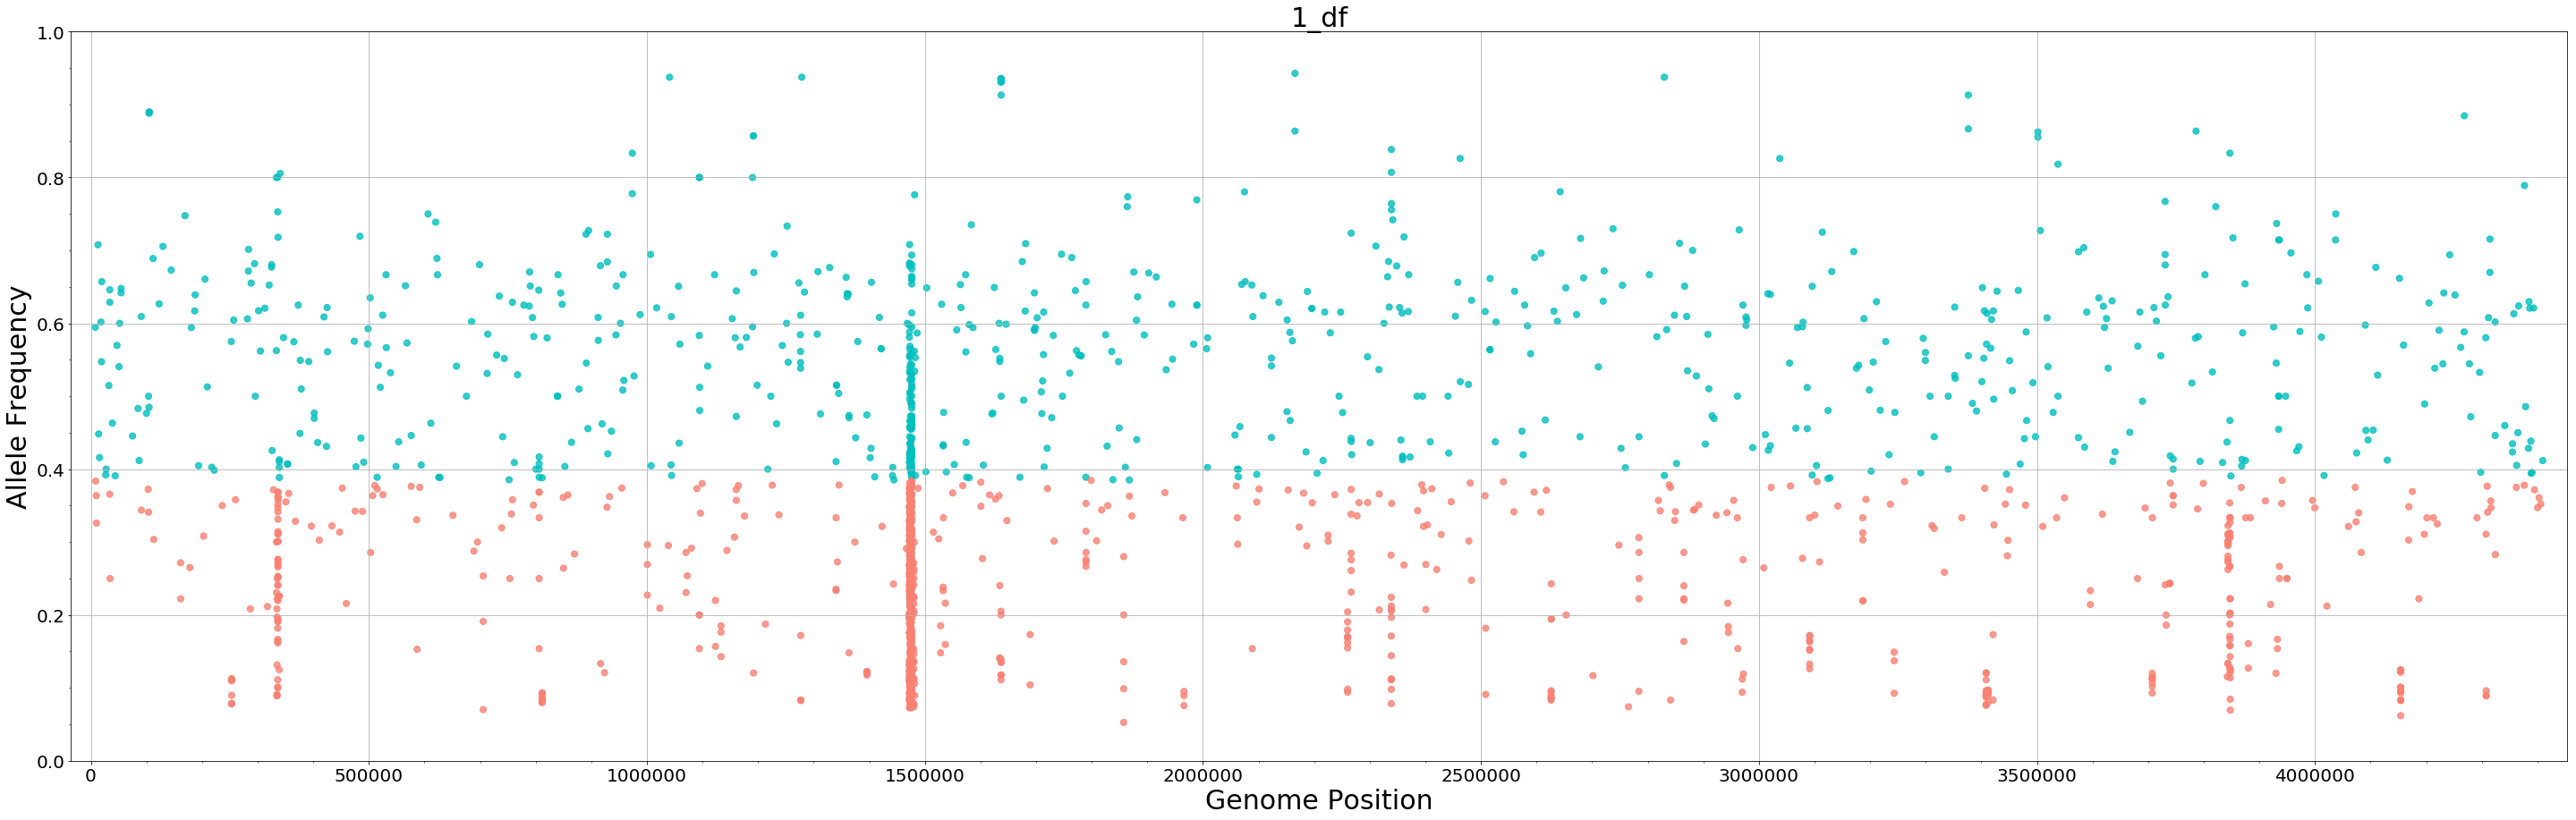

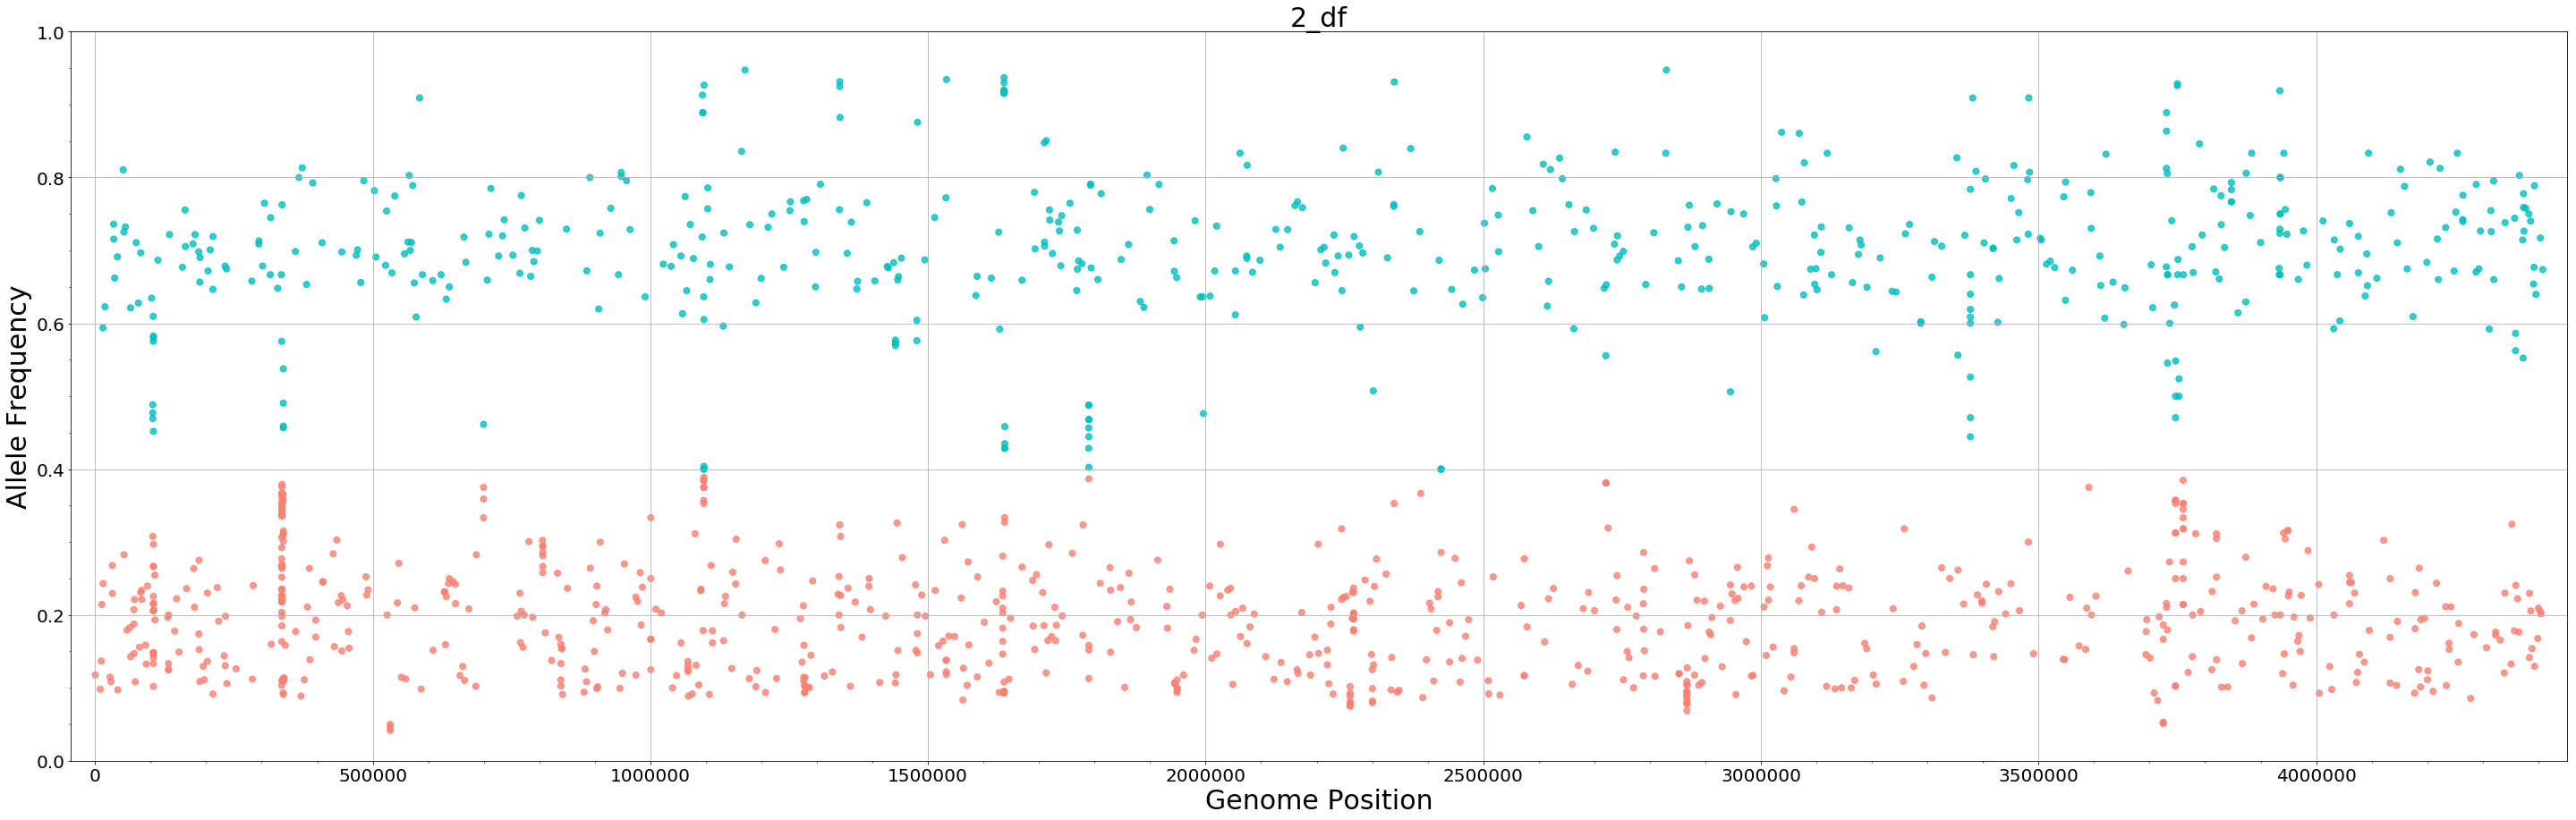

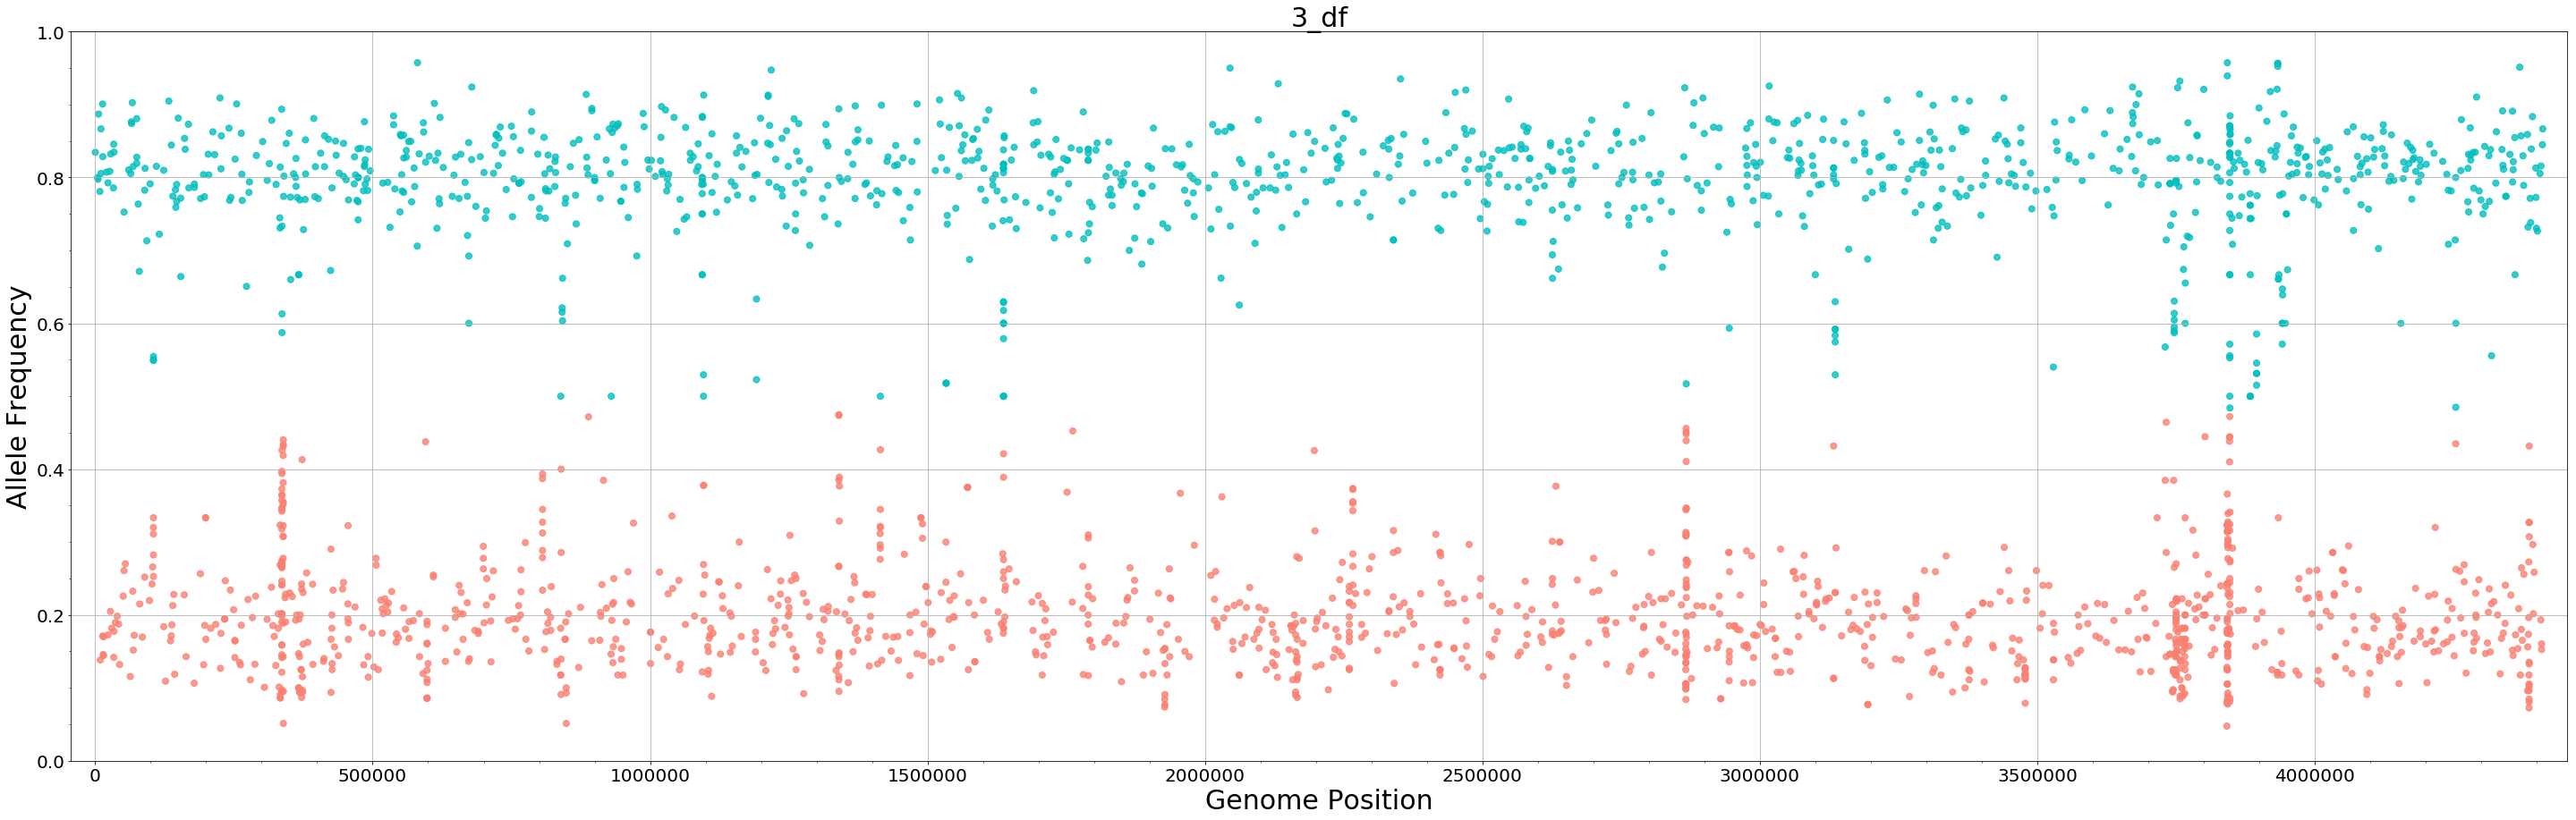

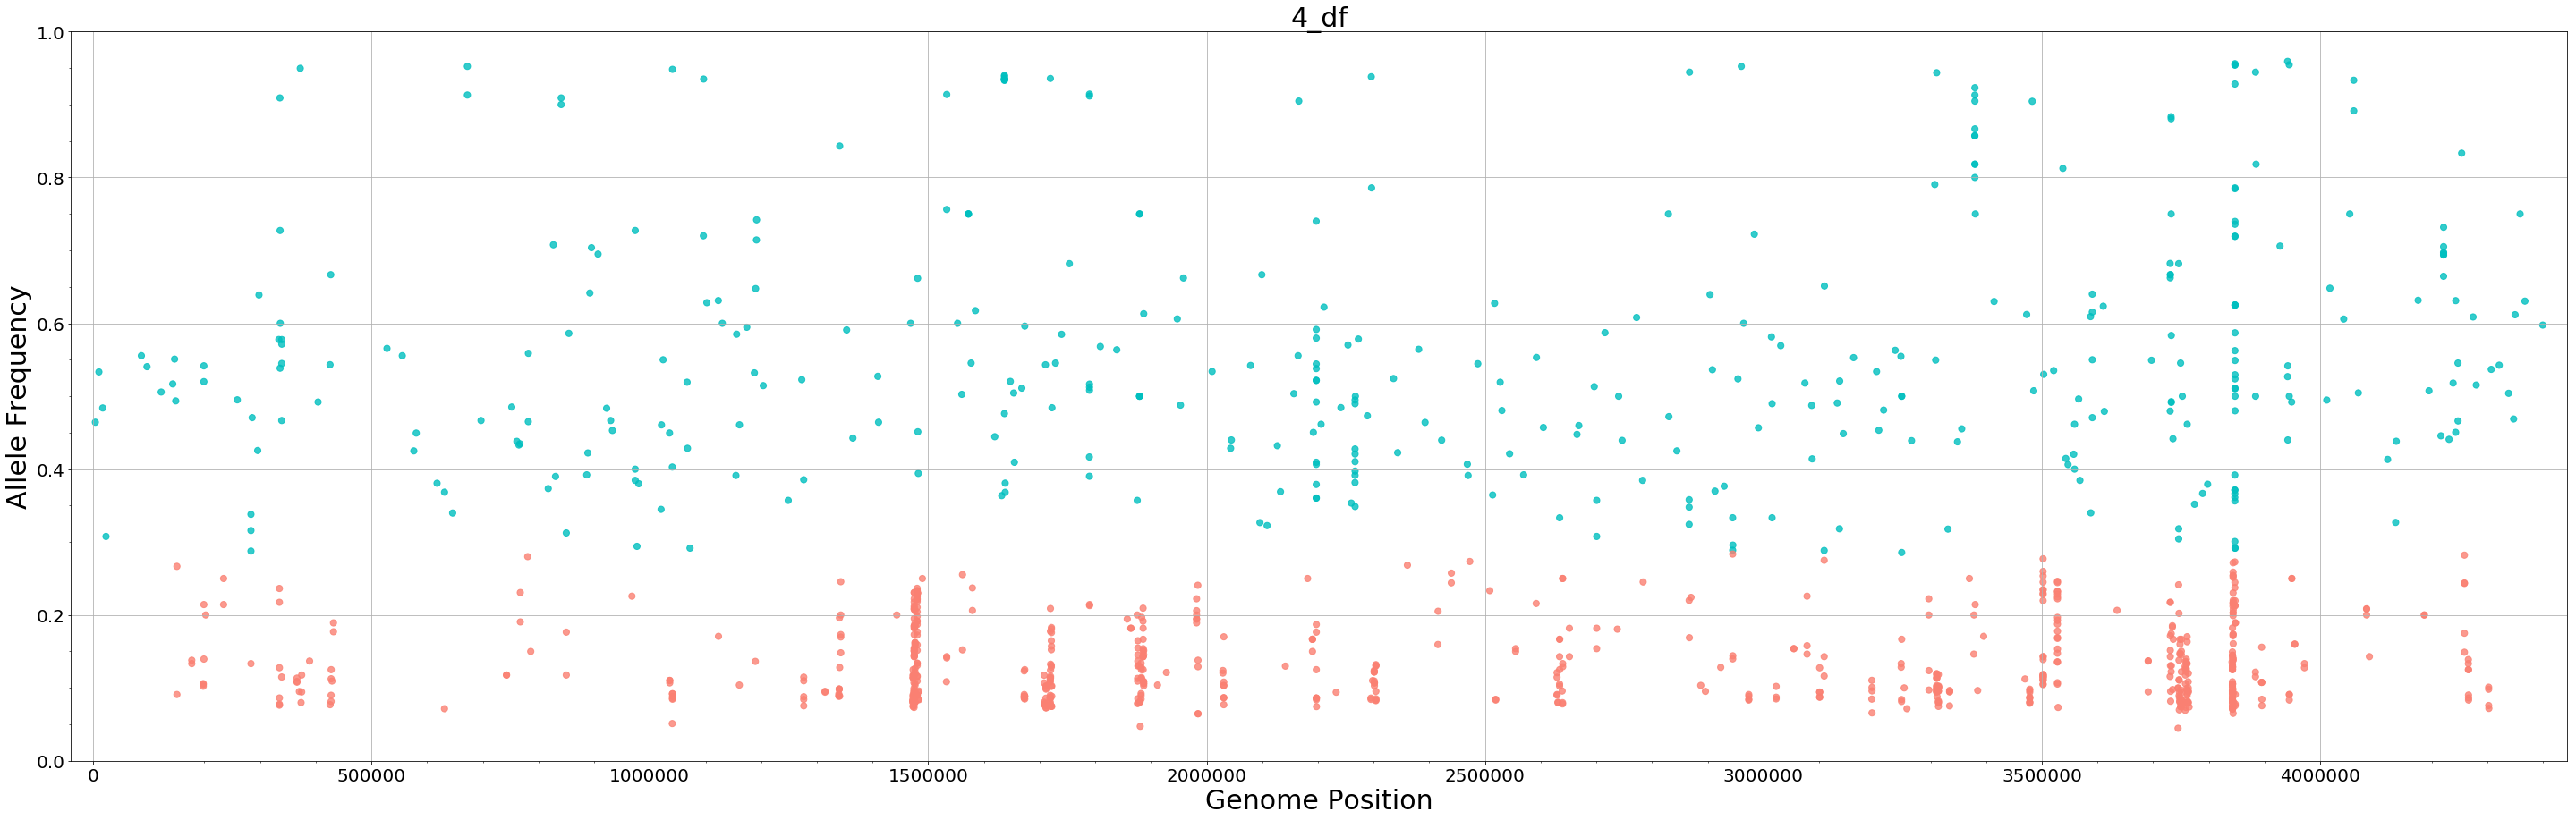

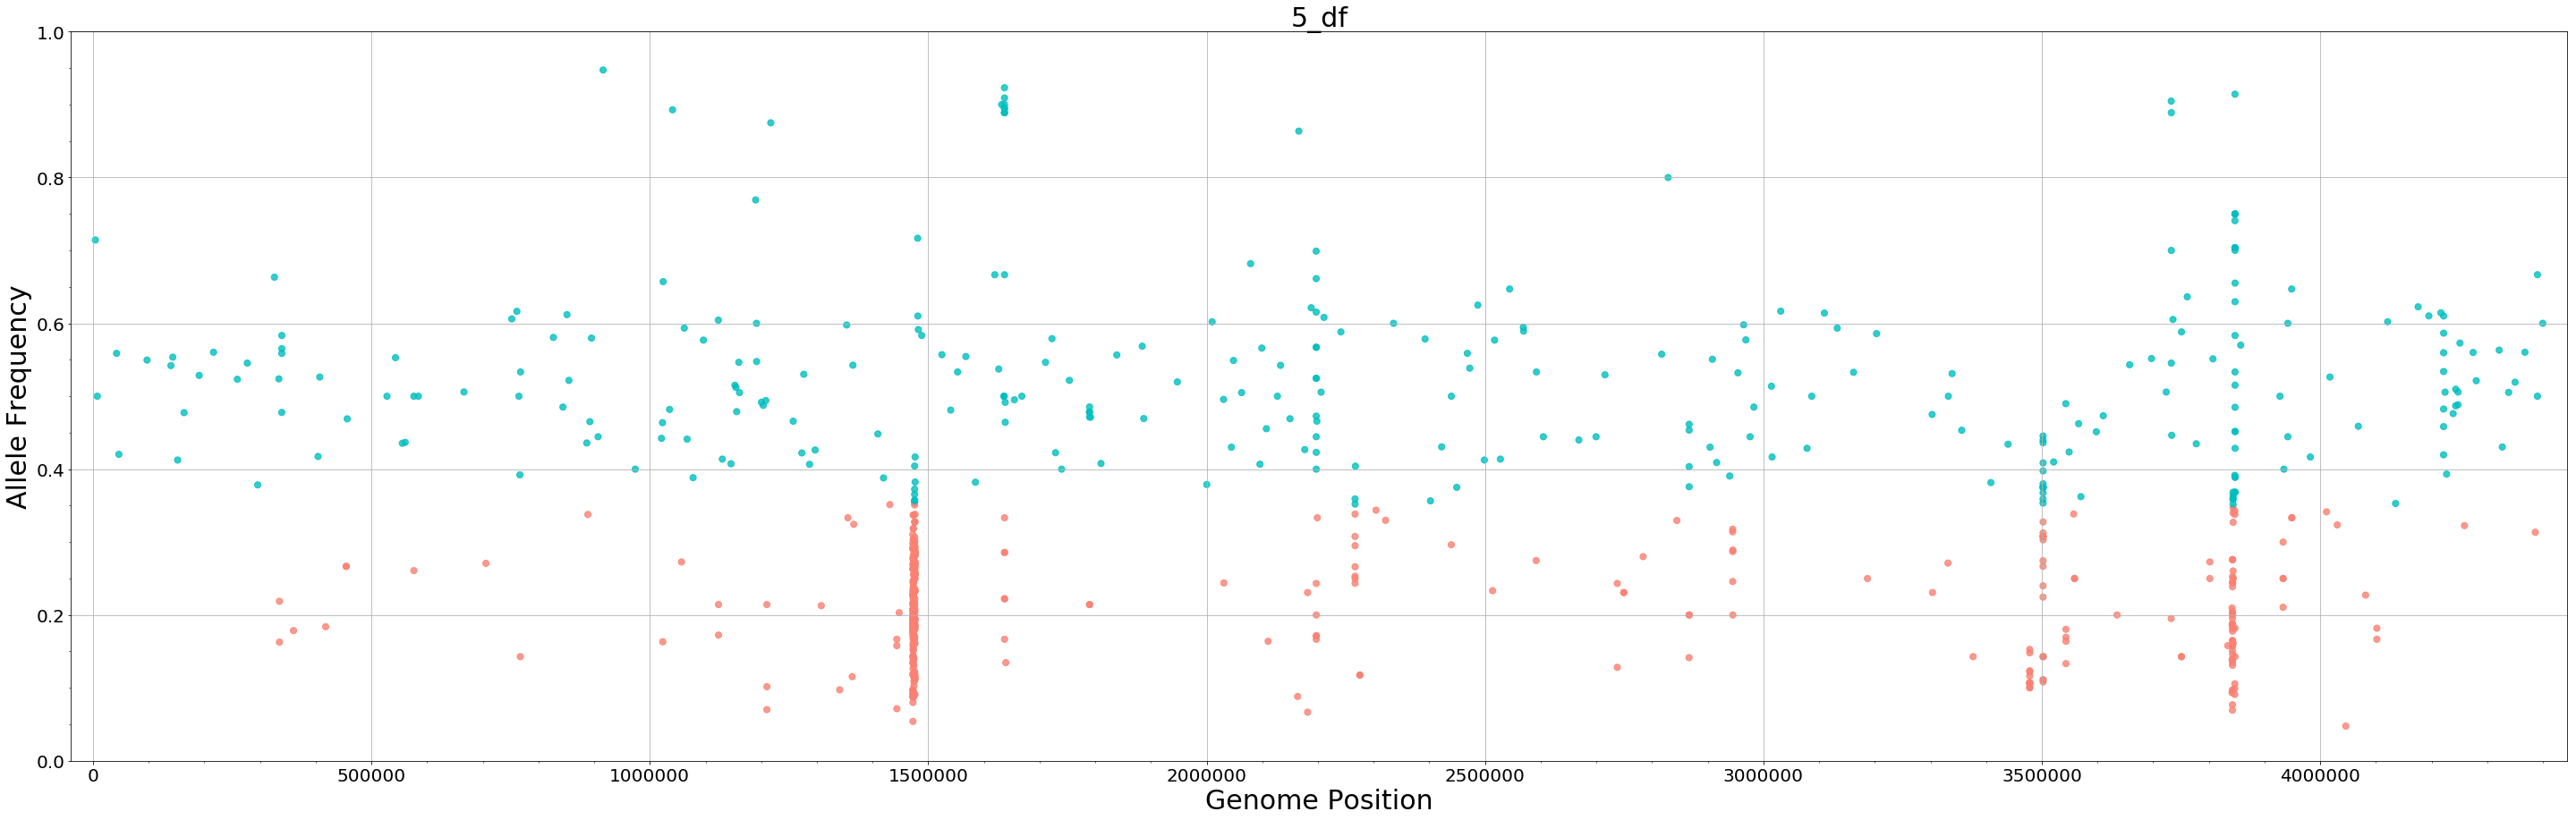

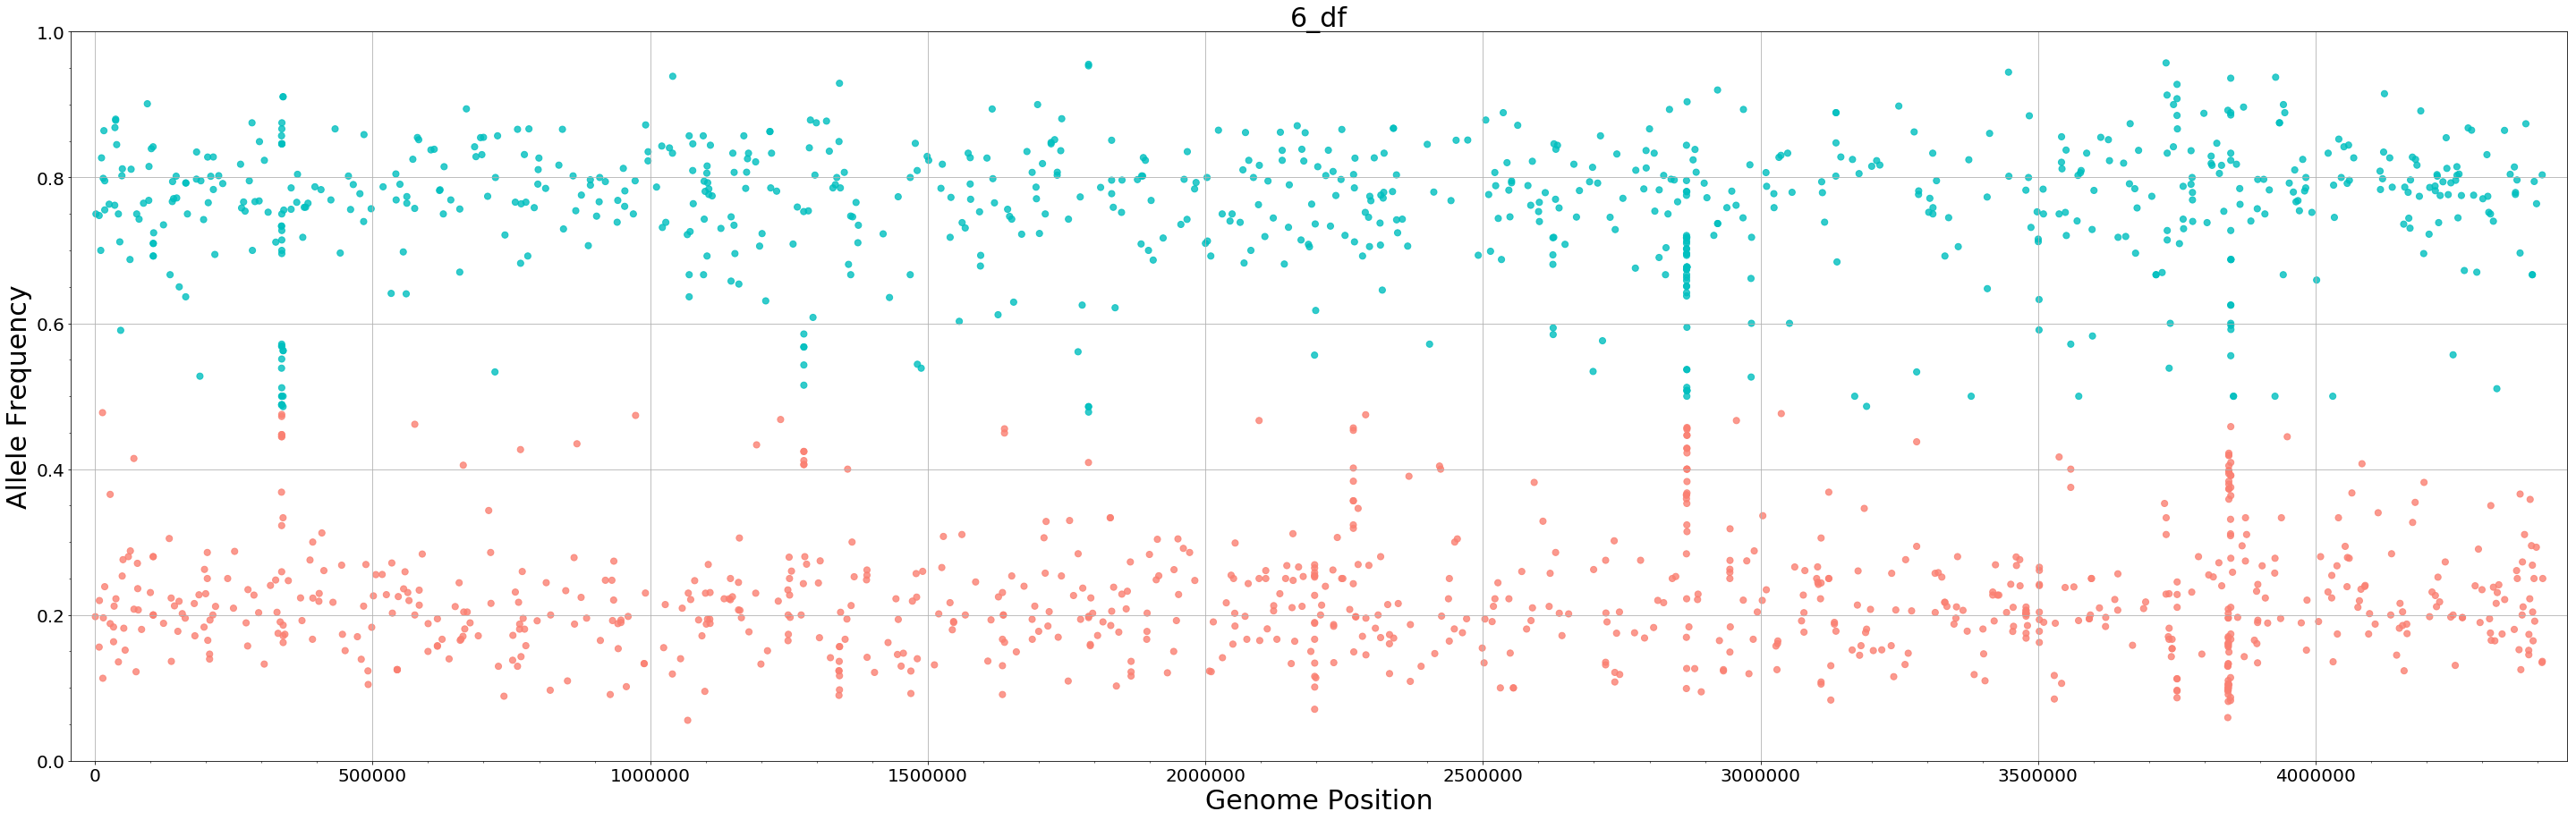

In [37]:
for name_df, df in dict_df.items():
    
    scatter_vcf_pos(df, name_df)

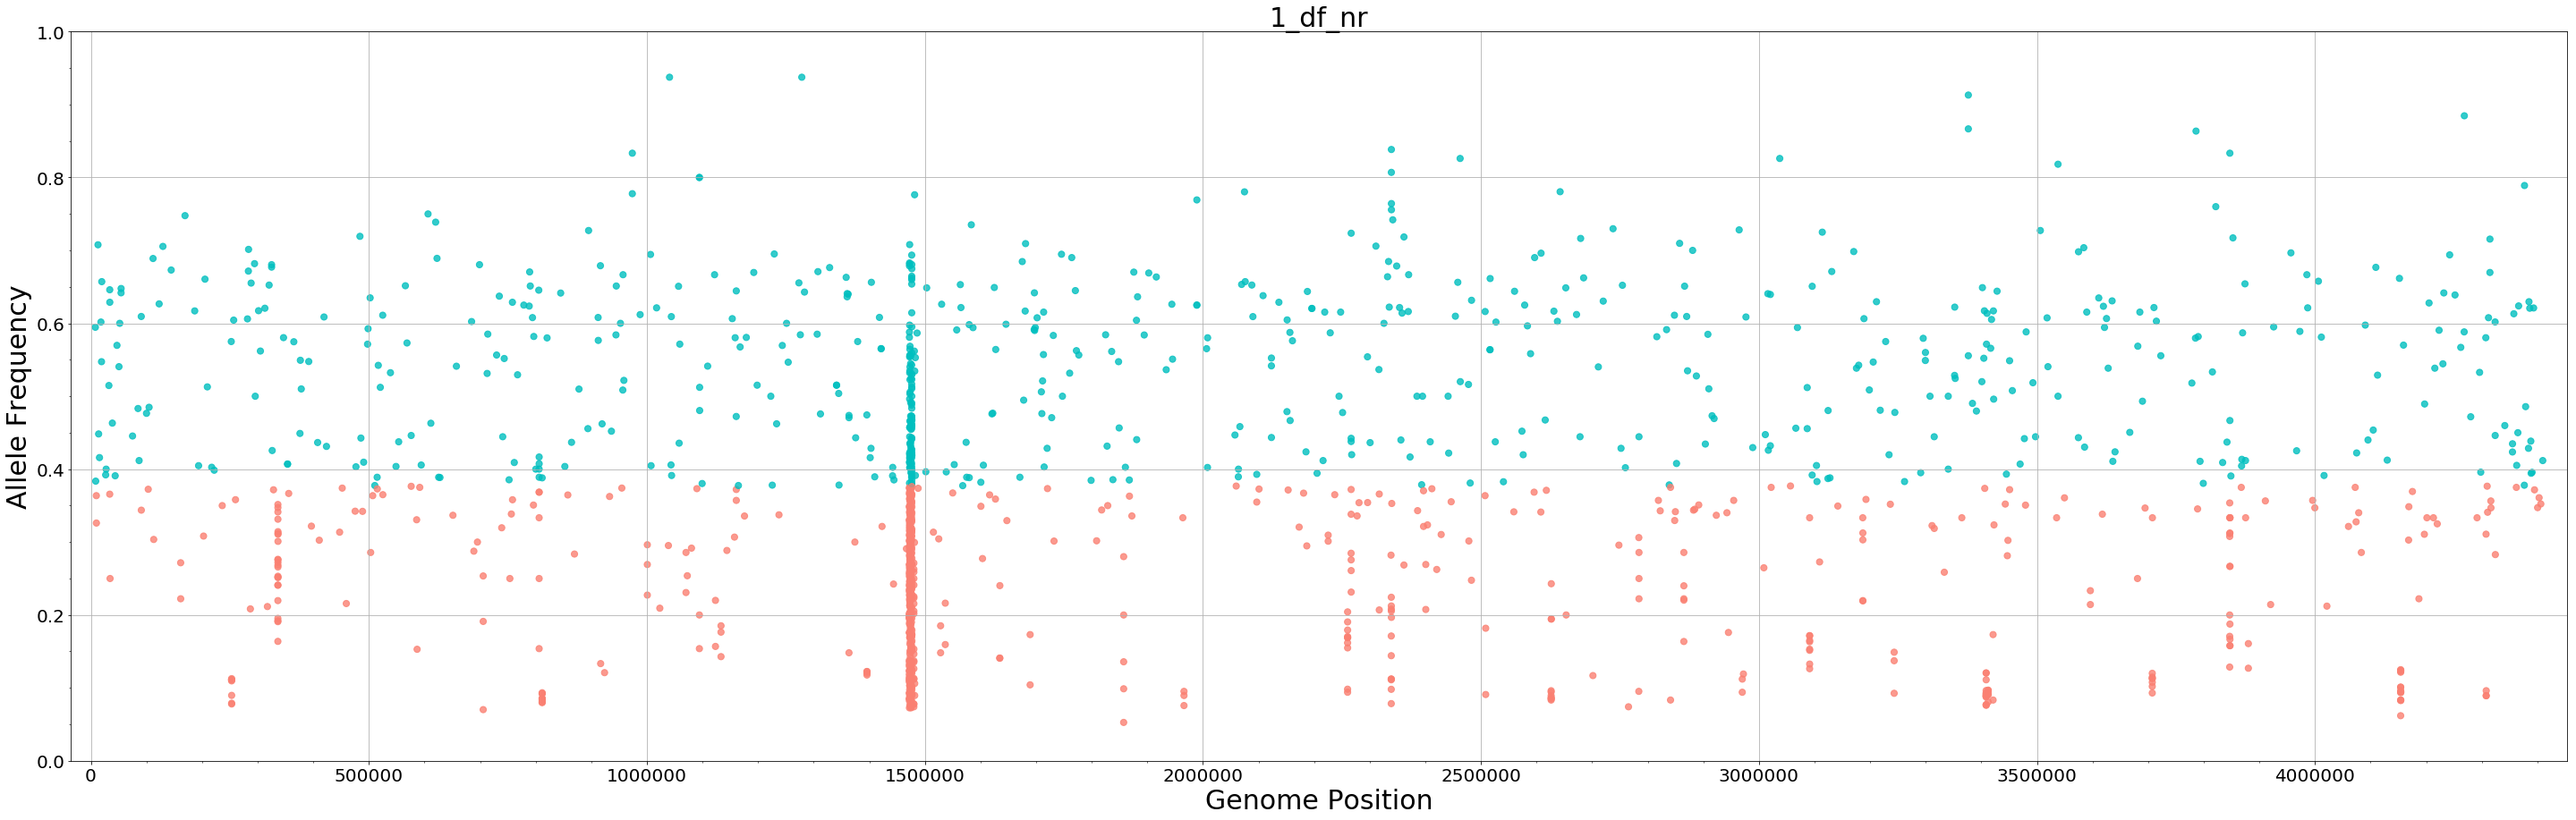

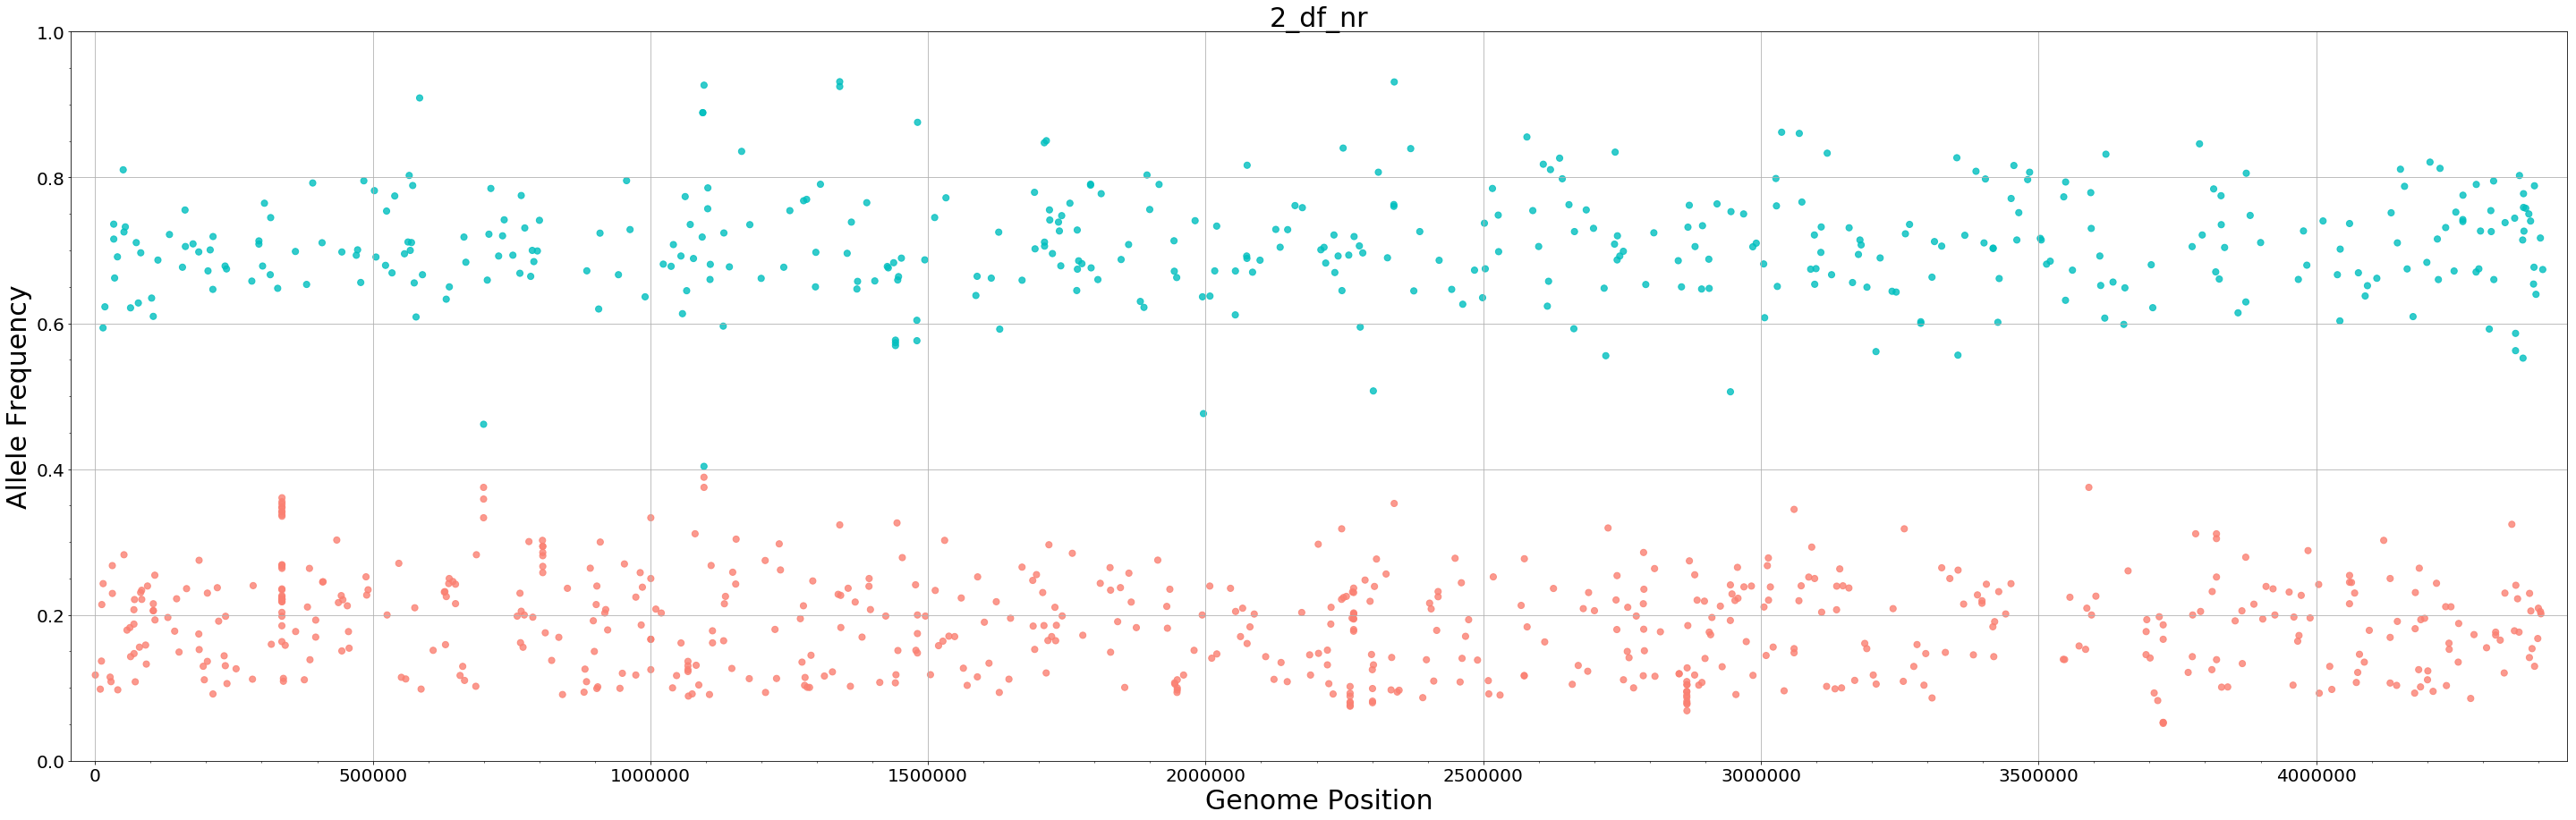

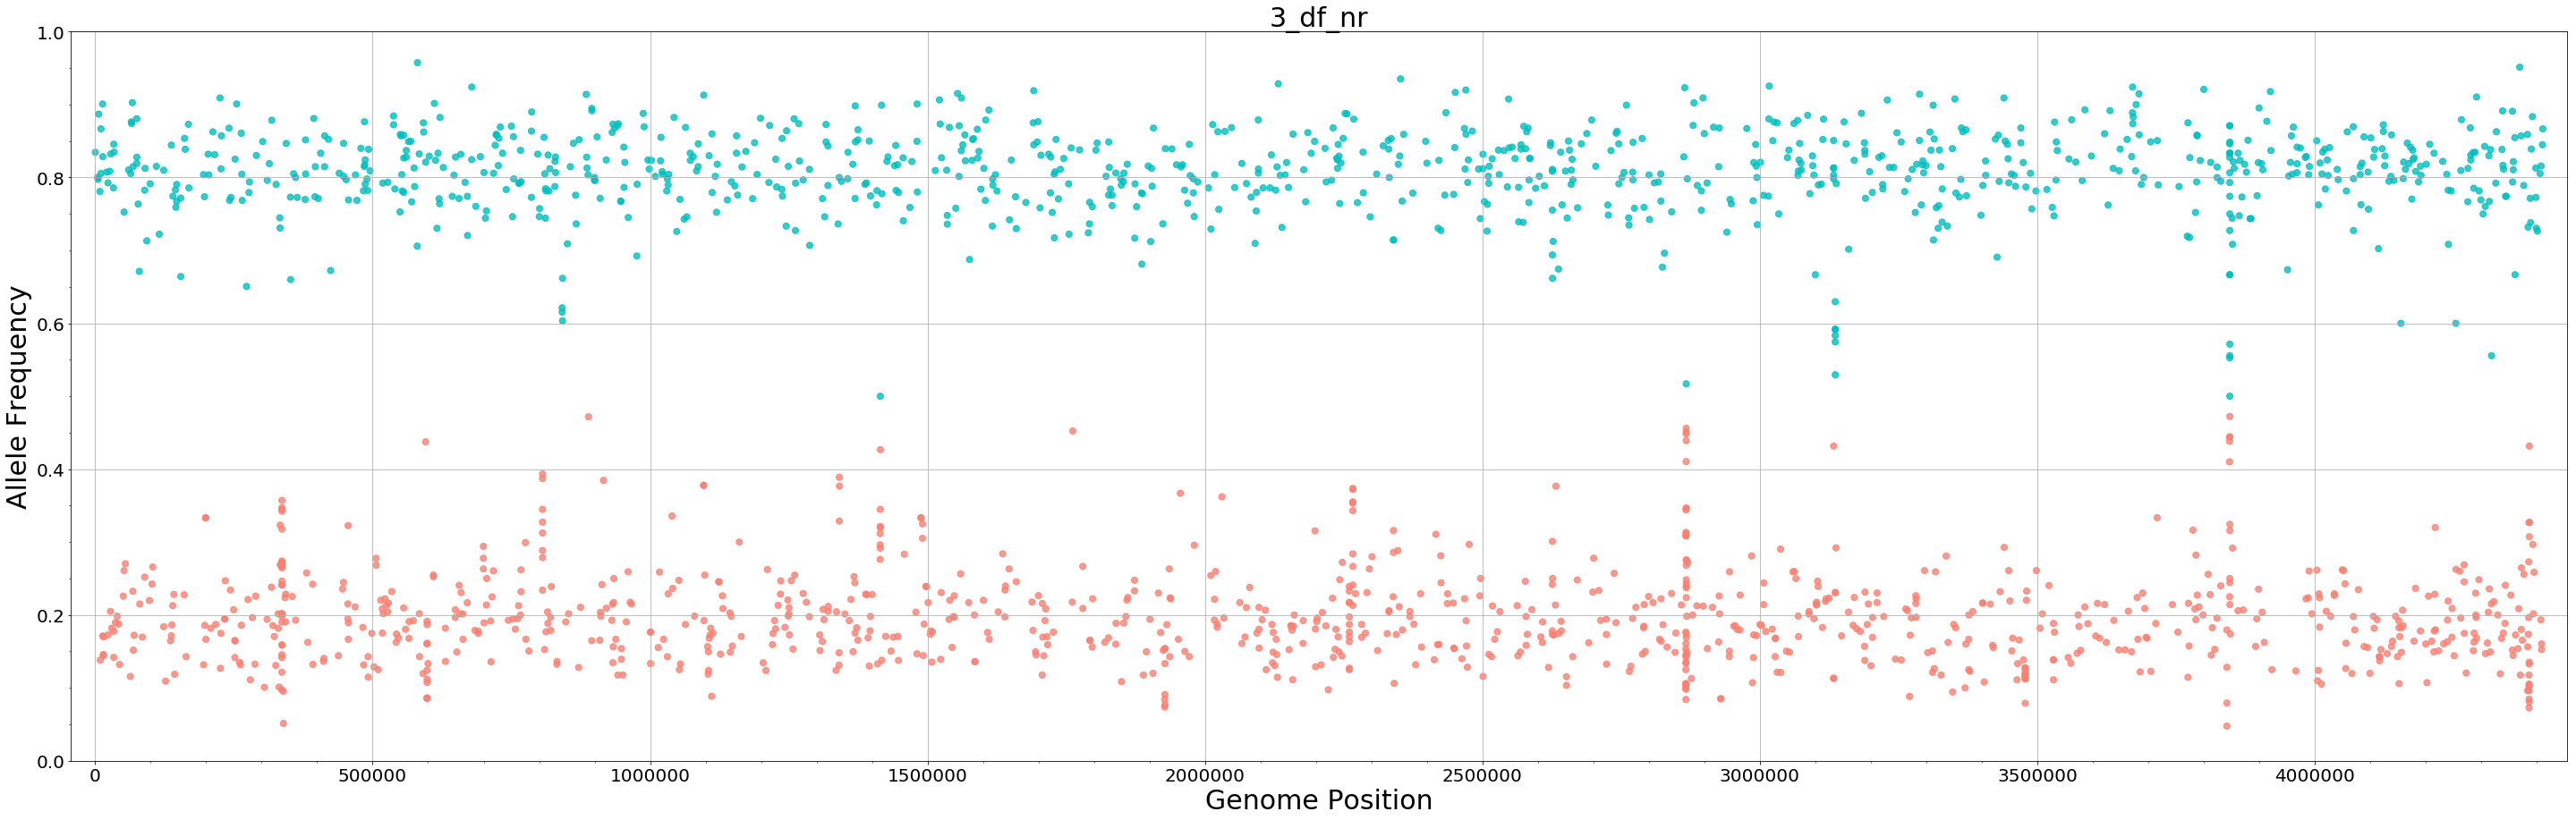

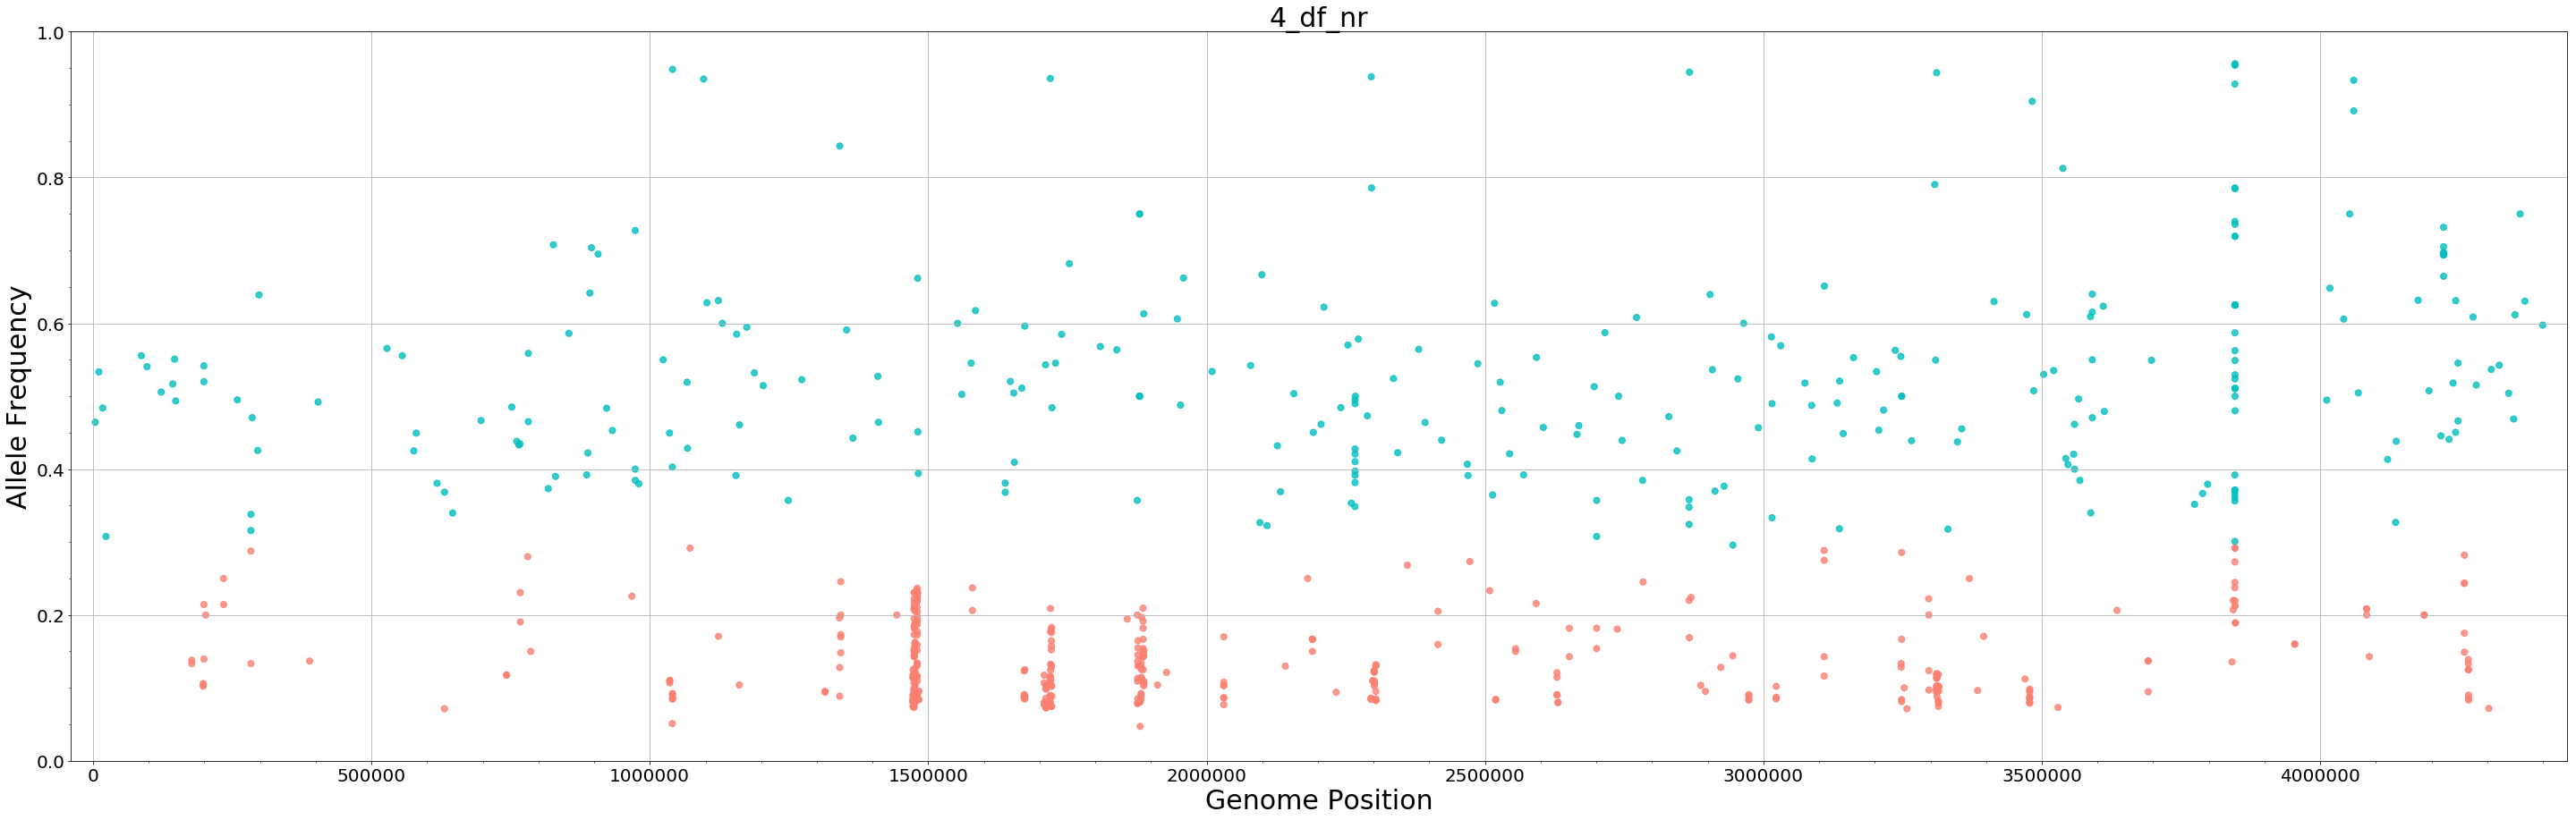

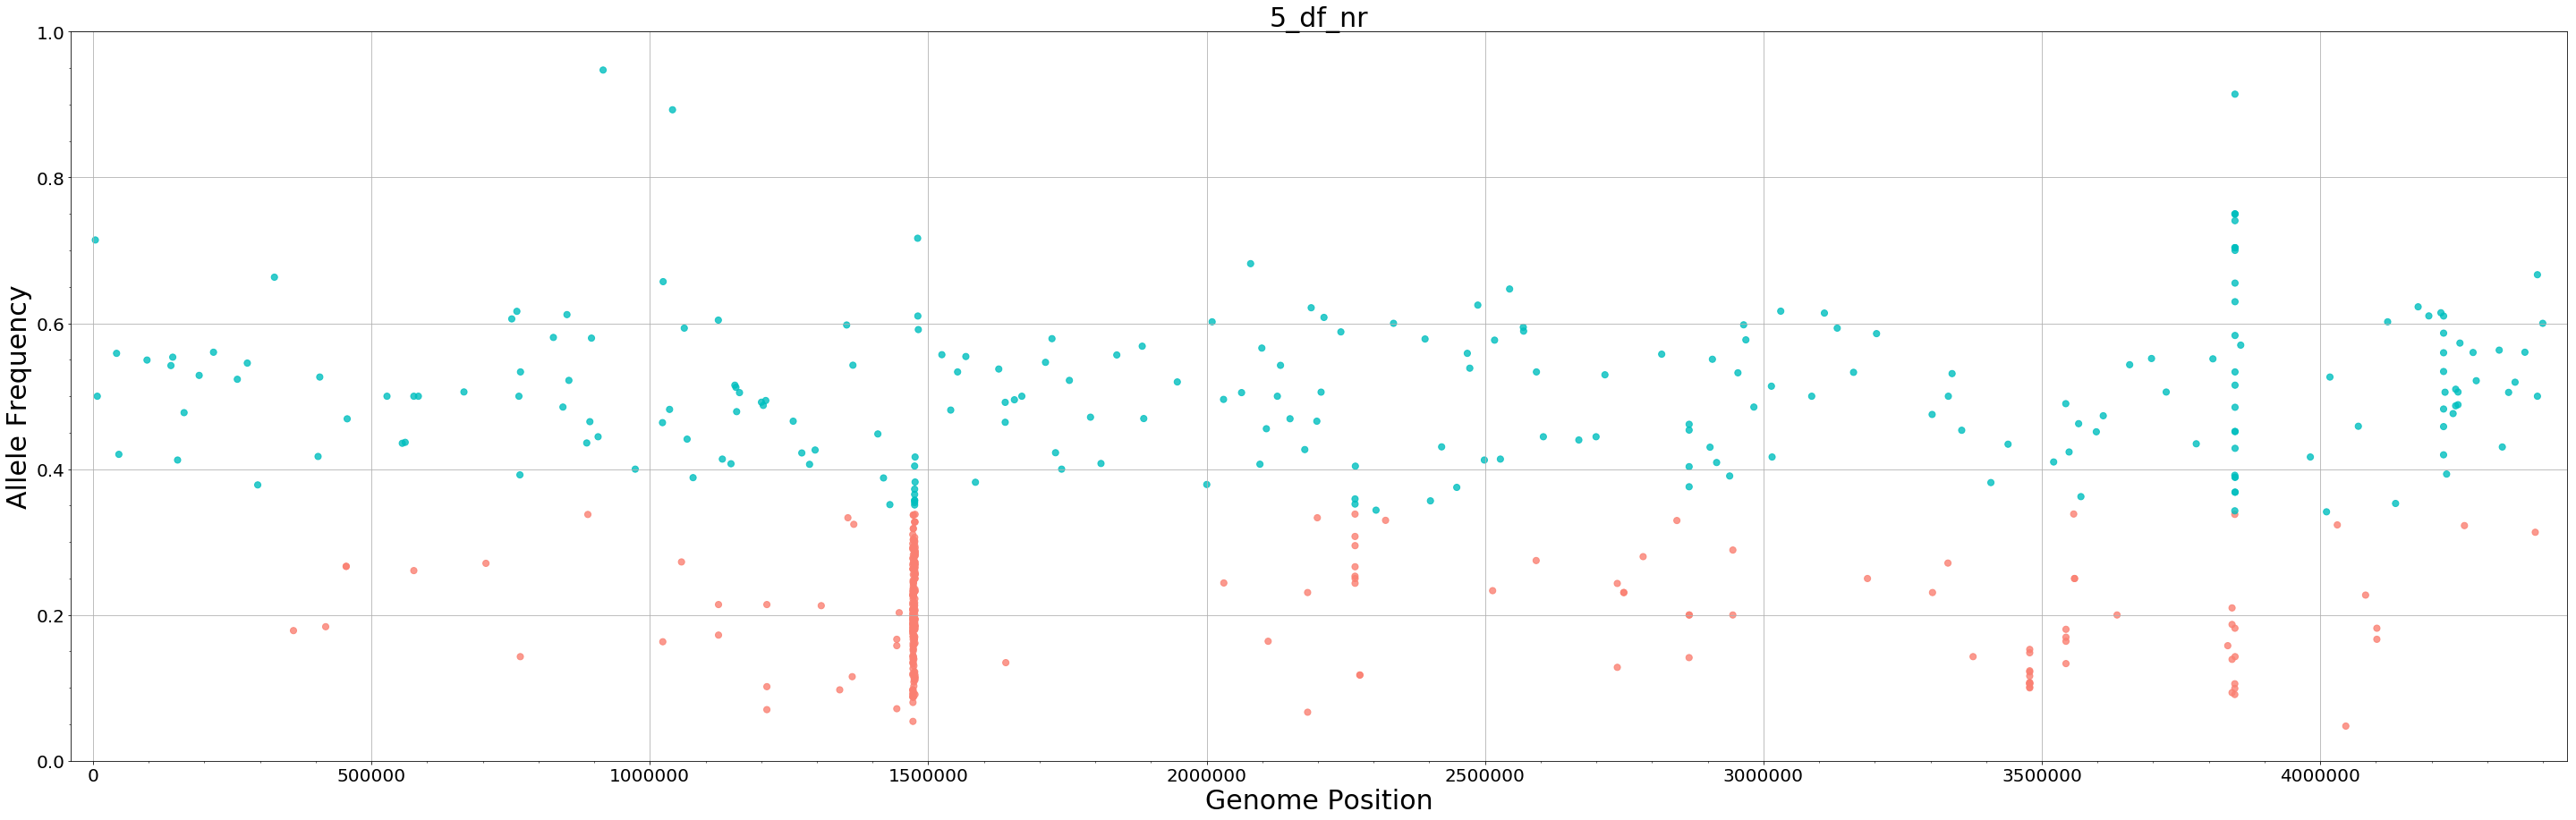

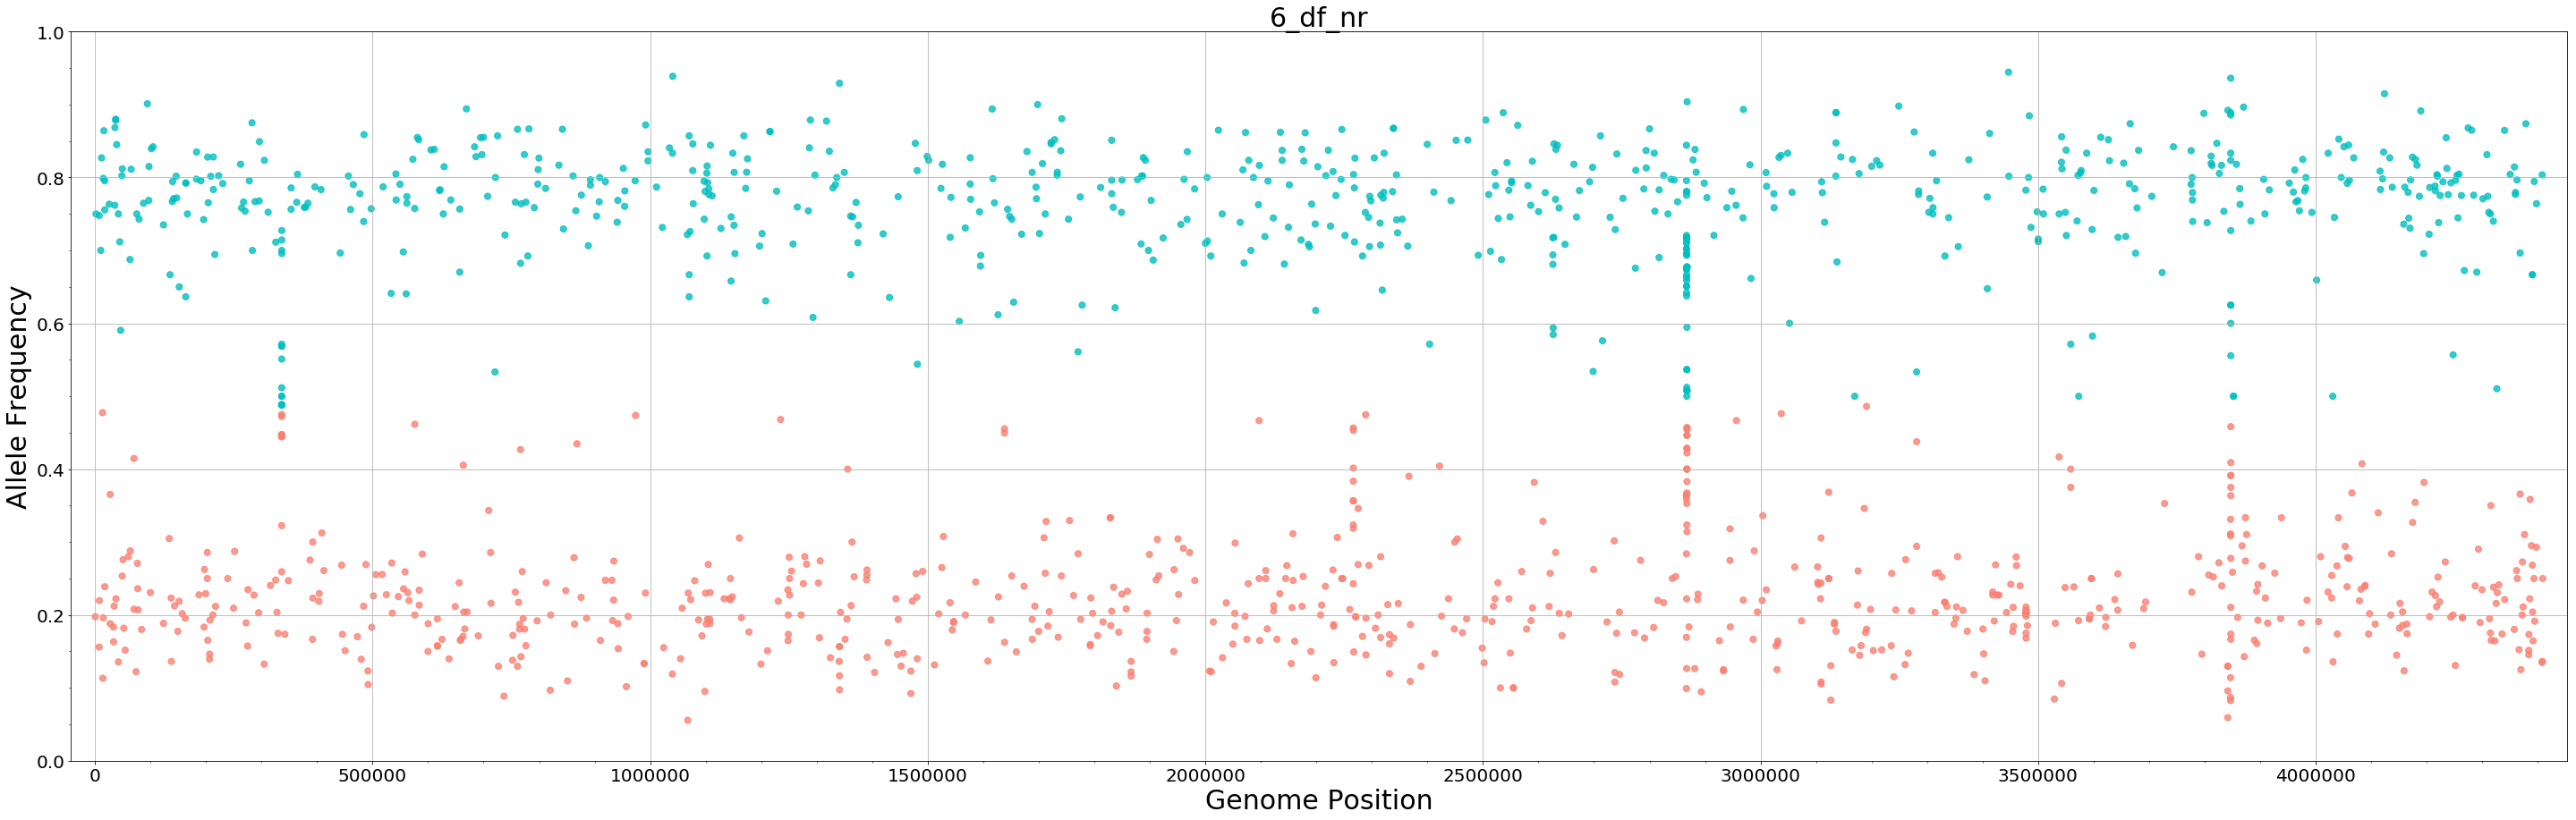

In [38]:
for name_nr, df_nr in dict_nr.items():
    scatter_vcf_pos(df_nr, name_nr)

In [41]:
print(dict_nr["2_df_nr"].loc[1002,'POS'])

2870386


# Add snp distance

In [42]:
def add_snp_distance(vcf_df):
    for index in vcf_df.index.values:
        if index > 0:
            vcf_df.loc[index,'snp_left_distance'] = vcf_df.loc[index,'POS'] - vcf_df.loc[index - 1,'POS']
        if index < (len(vcf_df.index.values) - 1):
            vcf_df.loc[index,'snp_right_distance'] = vcf_df.loc[index + 1,'POS'] - vcf_df.loc[index,'POS']
            
    return vcf_df

In [43]:
#P190_df_nr[P190_df_nr.isnull().any(axis=1)]

In [44]:
#Add distance to nr dataframes
#dict_dist = {}
for name_nr, df_nr in dict_nr.items():
    #name = name_nr + "_ds"
    dict_nr[name_nr] = add_snp_distance(df_nr)

In [45]:
dict_nr["1_df_nr"].head()

#CHROM   POS ID REF ALT     QUAL FILTER  \
0  MTB_anc  2532  .   C   T   921.03   PASS   
1  MTB_anc  8049  .   T   G  1319.60   PASS   
2  MTB_anc  8688  .   G   T   784.60   PASS   
3  MTB_anc  9143  .   C   T  3478.03   PASS   
4  MTB_anc  9841  .   C   T  1034.60   PASS   

                                                INFO          FORMAT  \
0  AC=2;AF=1.00;AN=2;DP=29;ExcessHet=3.0103;FS=0....  GT:AD:DP:GQ:PL   
1  AC=1;AF=0.500;AN=2;BaseQRankSum=0.873;DP=74;Ex...  GT:AD:DP:GQ:PL   
2  AC=1;AF=0.500;AN=2;BaseQRankSum=1.87;DP=73;Exc...  GT:AD:DP:GQ:PL   
3  AC=2;AF=1.00;AN=2;DP=106;ExcessHet=3.0103;FS=0...  GT:AD:DP:GQ:PL   
4  AC=1;AF=0.500;AN=2;BaseQRankSum=0.148;DP=121;E...  GT:AD:DP:GQ:PL   

                         sample  ...  PGT  PID   PS  REF_AD  ALT_AD        aF  \
0       1/1:0,29:29:87:935,87,0  ...  NaN  NaN  NaN     0.0    29.0  0.000000   
1    0/1:30,44:74:99:1327,0,793  ...  NaN  NaN  NaN    30.0    44.0  0.405405   
2    0/1:45,28:73:99:792,0,1301  ...  NaN  NaN  NaN    45.0    28.0  0.616438   
3   1/1:0,106:106:99:3492,318,0  ...  NaN  NaN  NaN     0.0   106.0  0.000000   
4  0/1:77,44:121:99:1042,0,2063  ...  NaN  NaN  NaN    77.0    44.0  0.636364   

         AF  Is_repeat  snp_right_distance  snp_left_distance  
0  1.000000      False              5517.0                NaN  
1  0.594595      False               639.0             5517.0  
2  0.383562      False               455.0              639.0  
3  1.000000      False               698.0              455.0  
4  0.363636      False               103.0              698.0  

[5 rows x 38 columns]

# Apply distance filtering

In [46]:
def filter_by_distance(vcf_dist_df, distance):
    vcf_df_filtered_distance = vcf_dist_df[((vcf_dist_df['snp_right_distance'] > distance) | (vcf_dist_df['snp_left_distance'] > distance))]
    return vcf_df_filtered_distance

In [47]:
dict_dsf = {}
for name_nr, df_nr in dict_nr.items():
    name_dsf = name_nr + "_dsf"
    dict_dsf[name_dsf] = filter_by_distance(df_nr, 500)

In [48]:
for n, d in dict_dsf.items():
    print(i, d.shape)

6_df_nr (1251, 38)
6_df_nr (1385, 38)
6_df_nr (1744, 38)
6_df_nr (1178, 38)
6_df_nr (1080, 38)
6_df_nr (1525, 38)


In [49]:
print(dict_nr["1_df_nr"].shape)
print(dict_dsf["1_df_nr_dsf"].shape)

(1956, 38)
(1251, 38)


In [50]:
dict_dsf["3_df_nr_dsf"]['AF'].describe()

count    1744.000000
mean        0.521186
std         0.316697
min         0.047619
25%         0.192308
50%         0.729625
75%         0.817518
max         1.000000
Name: AF, dtype: float64

# Draw with distance applied

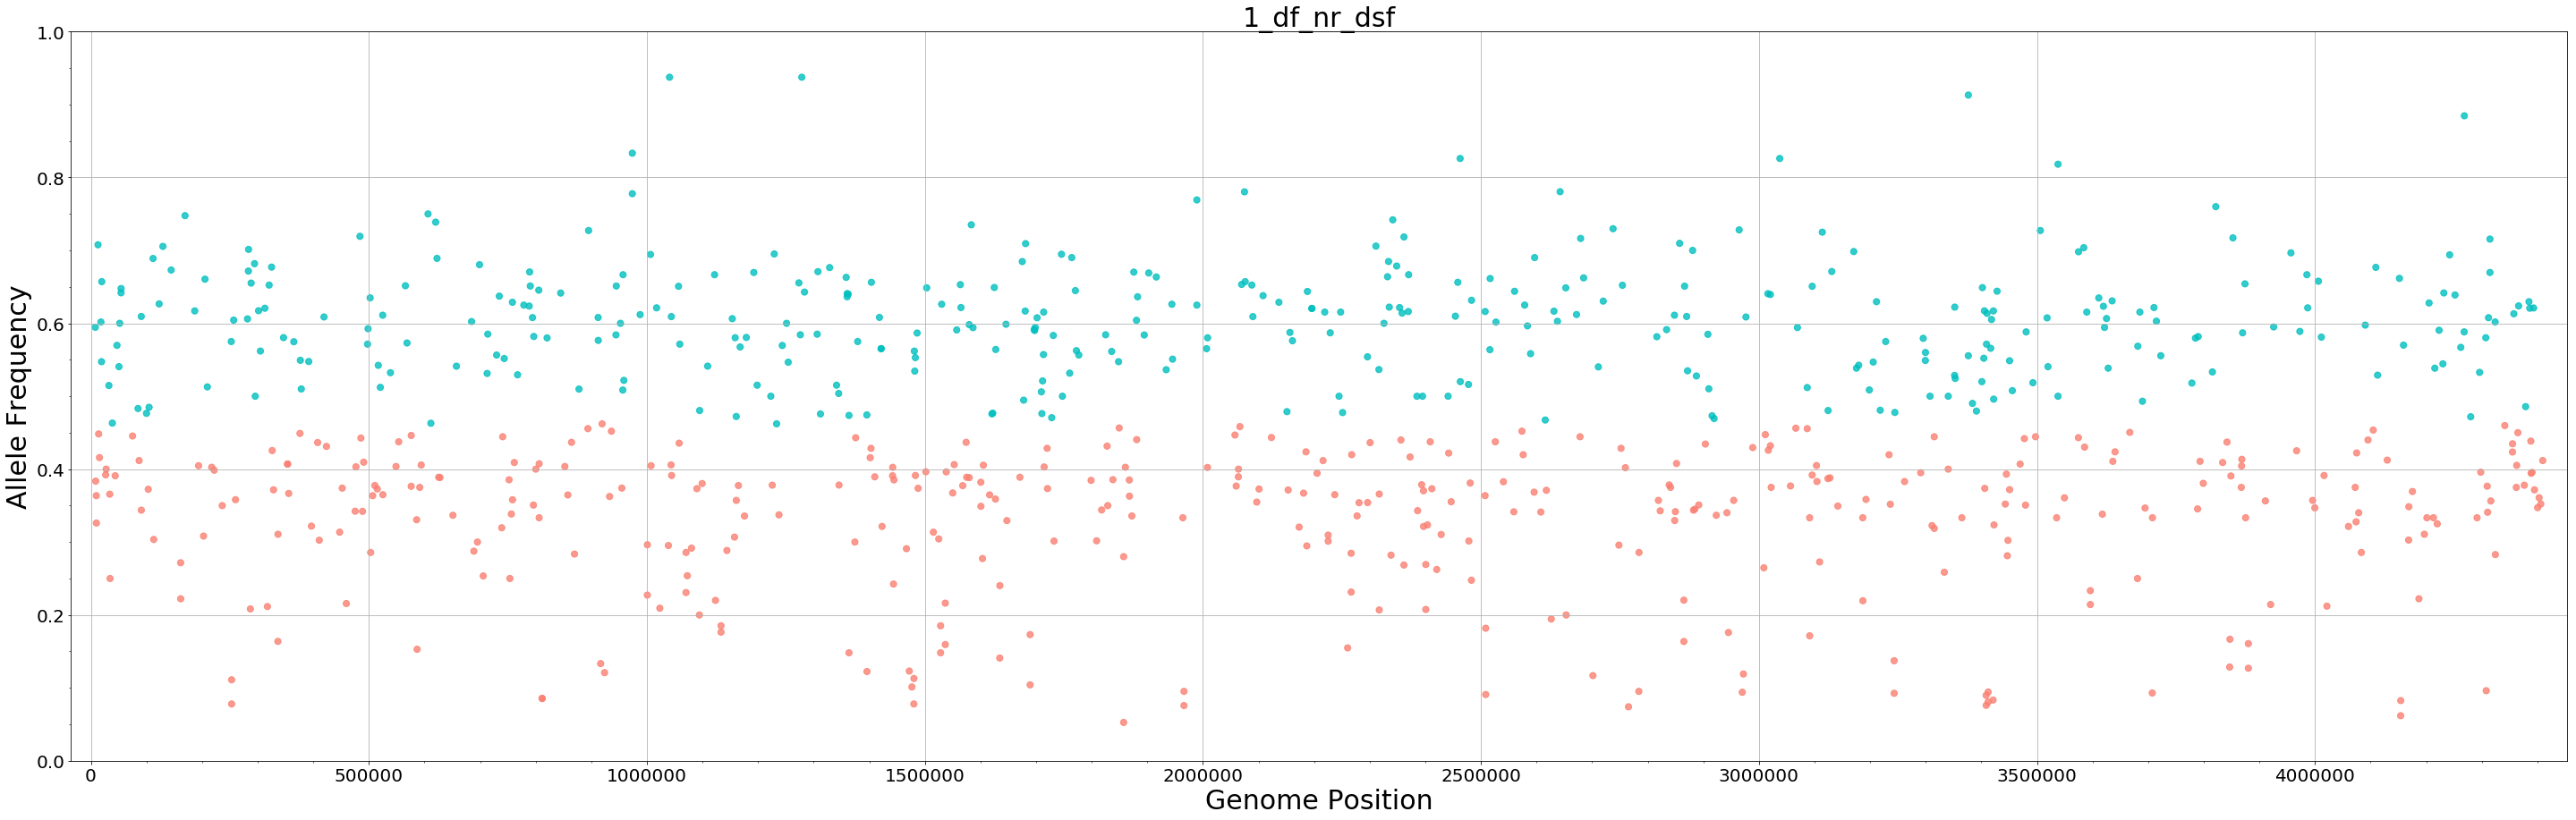

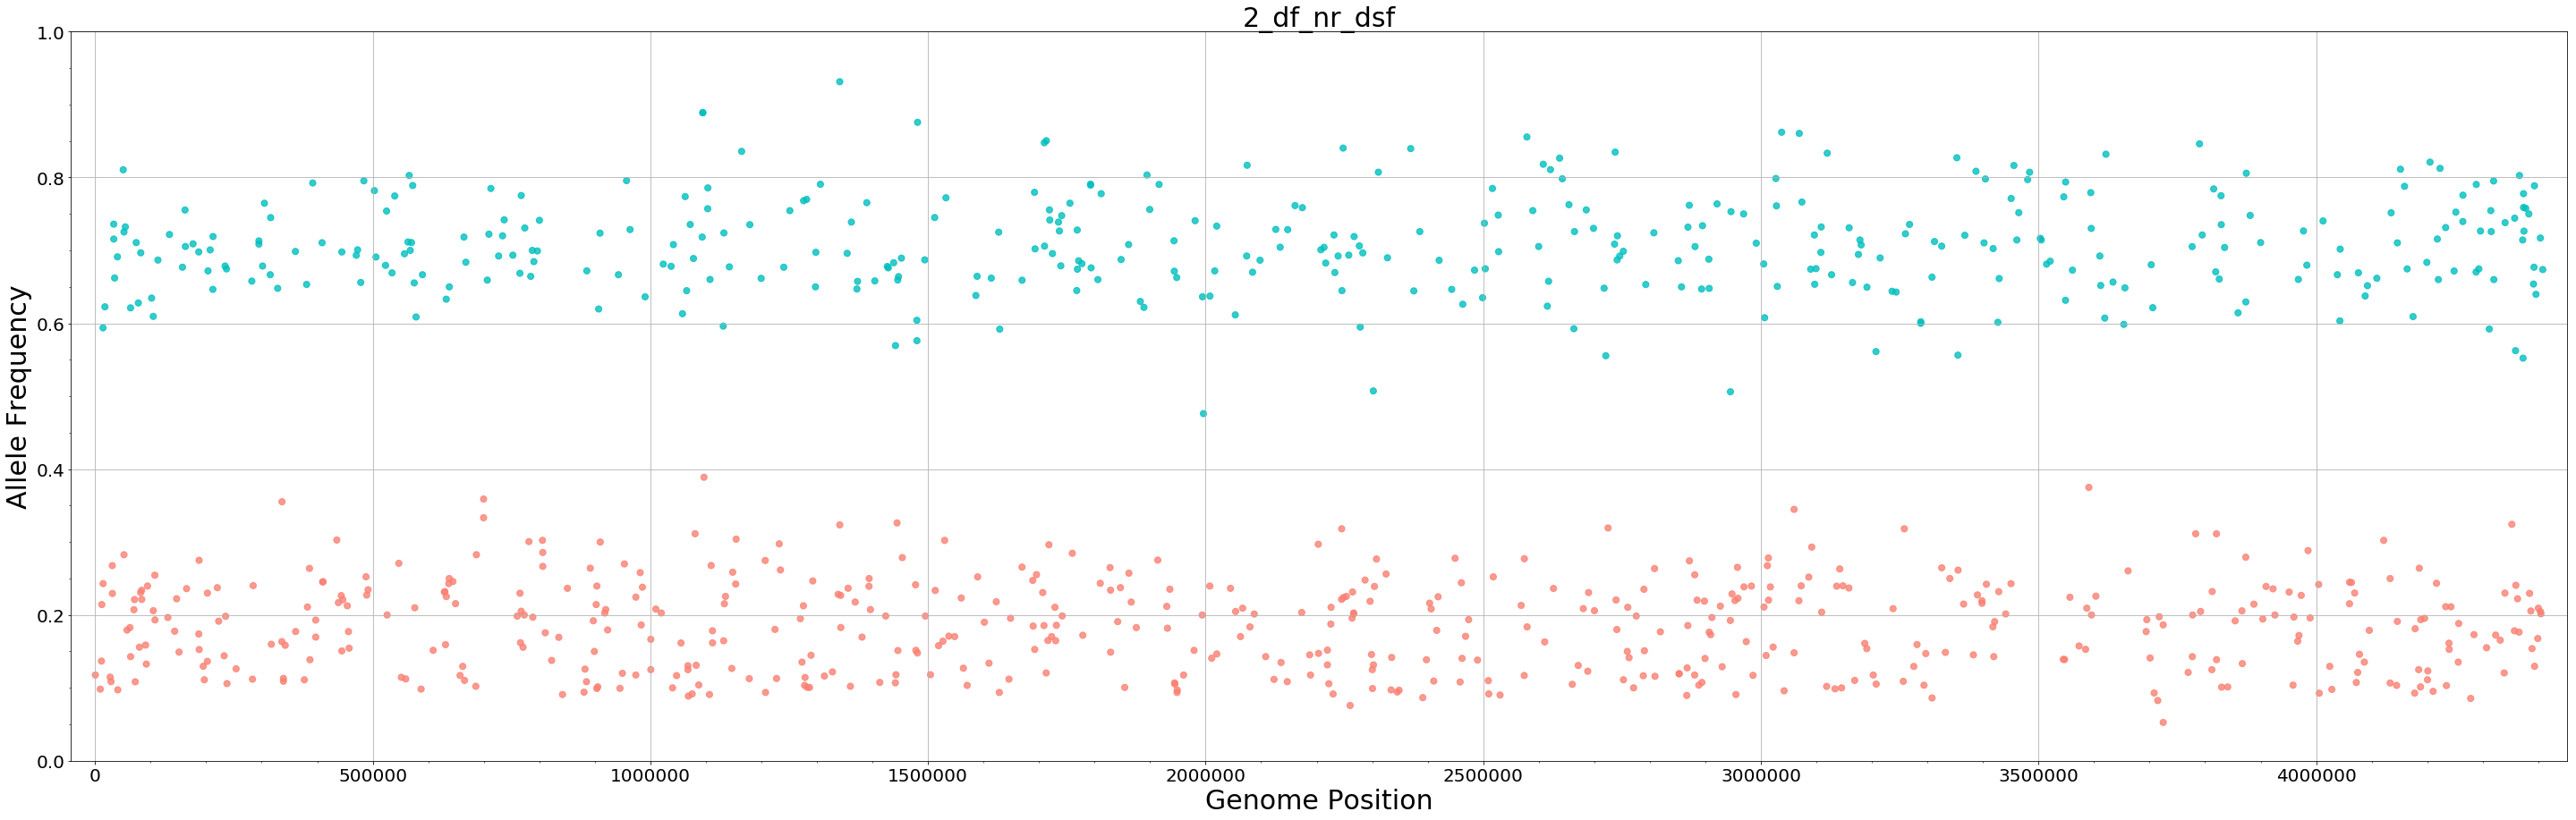

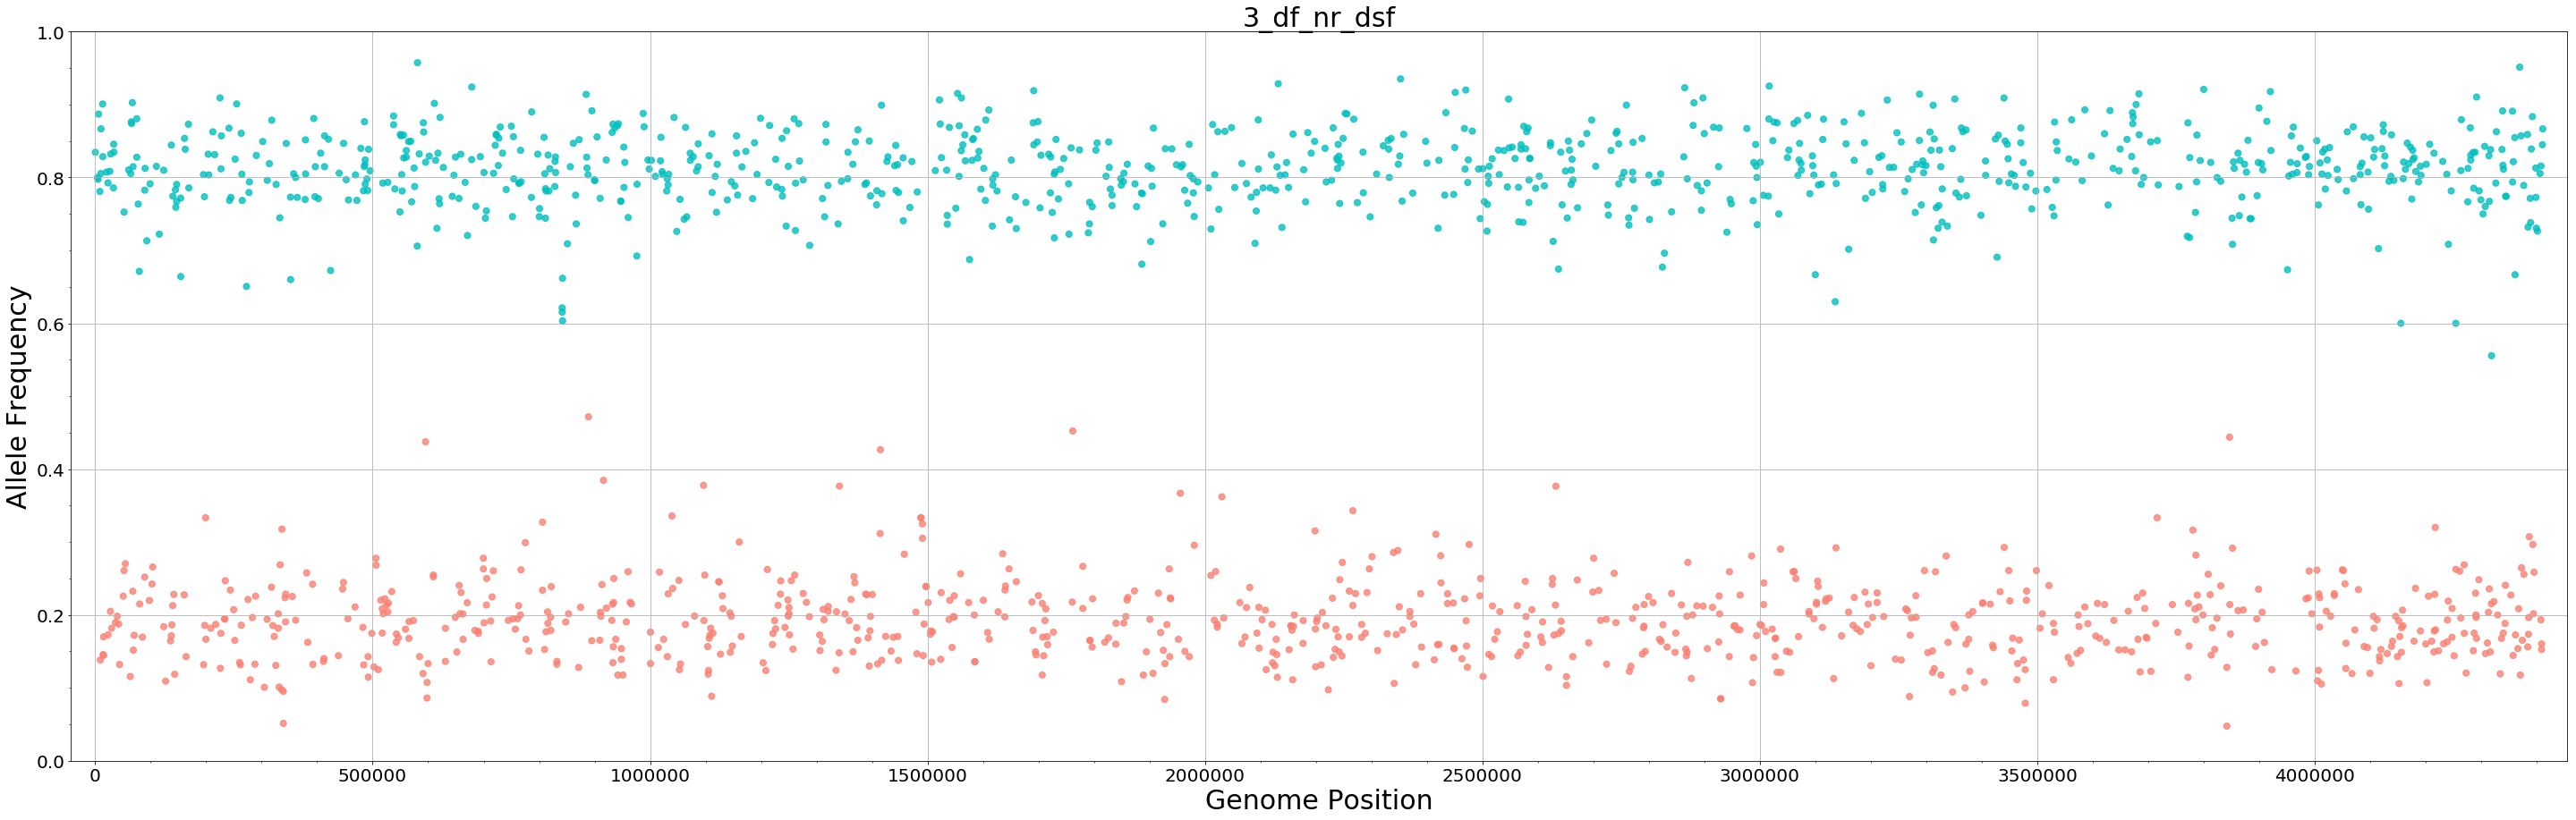

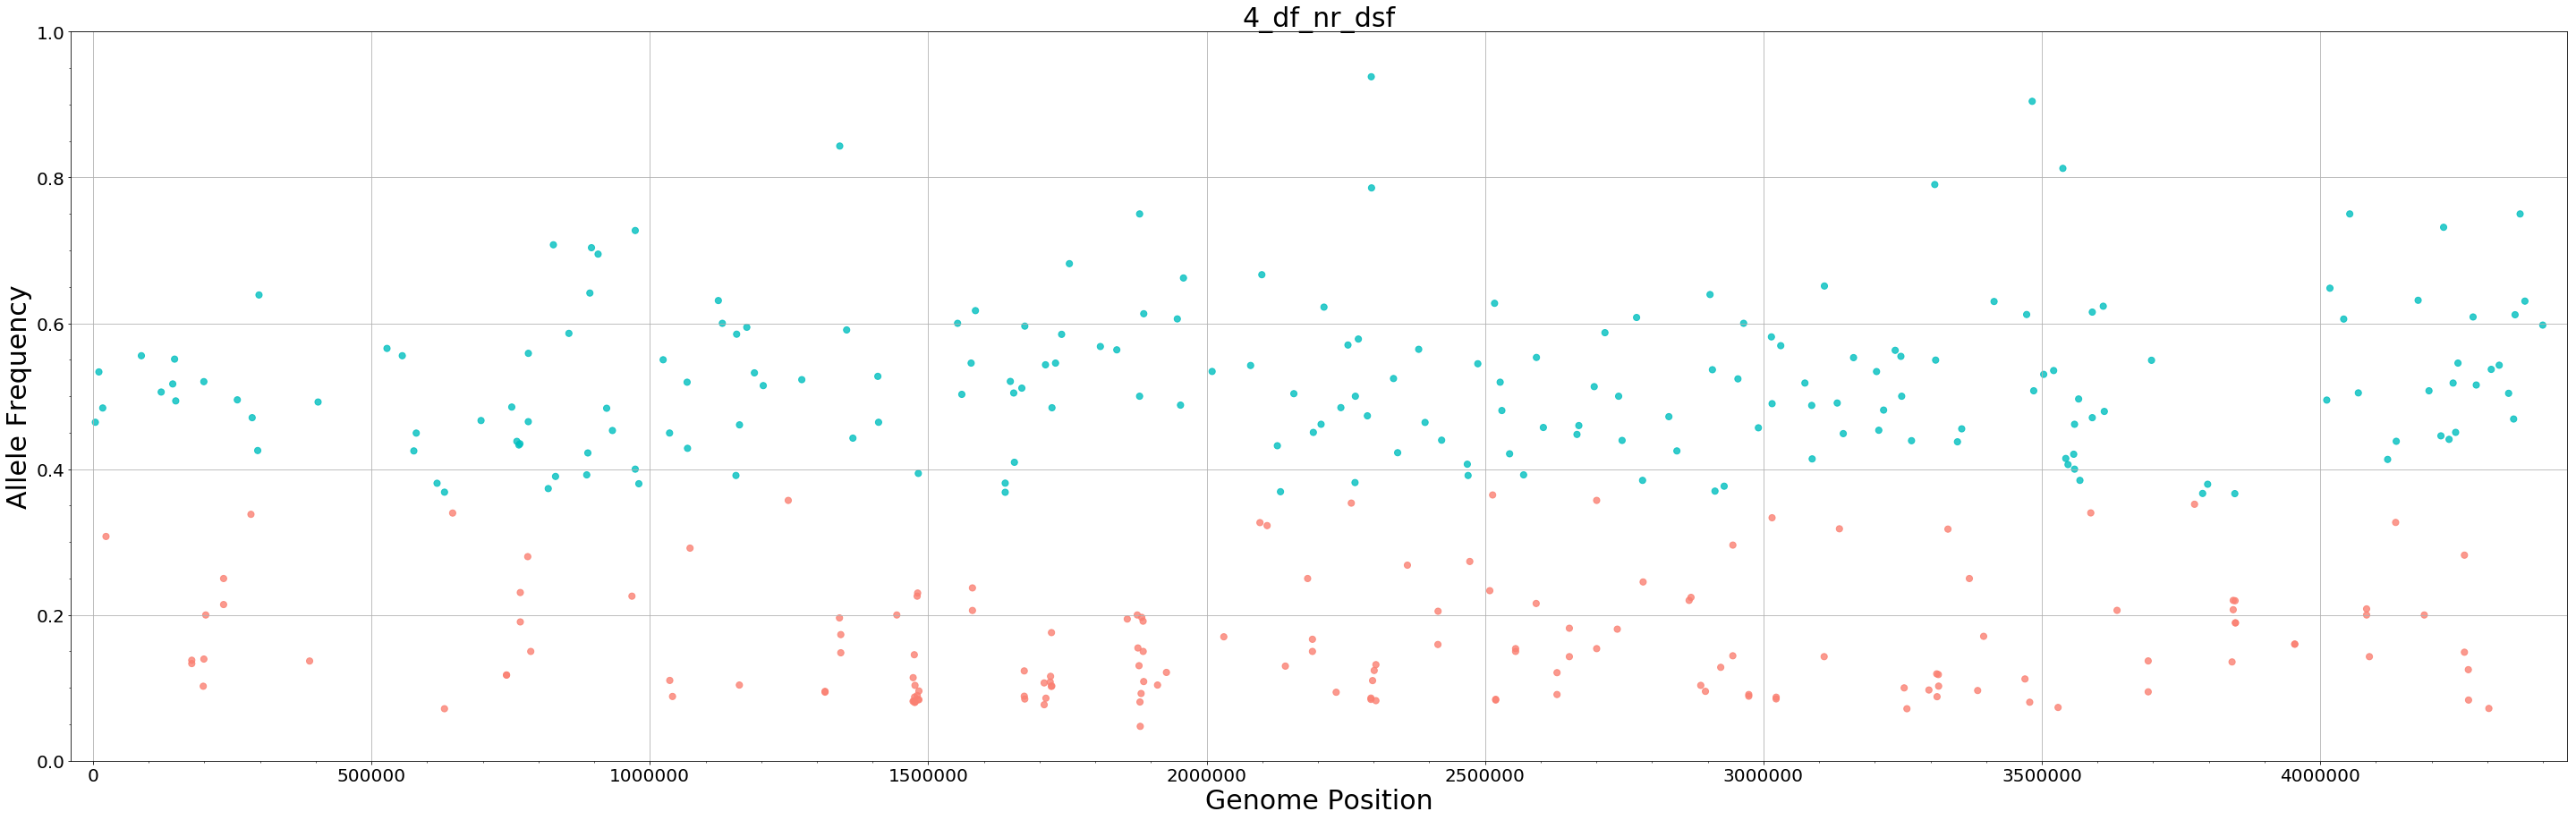

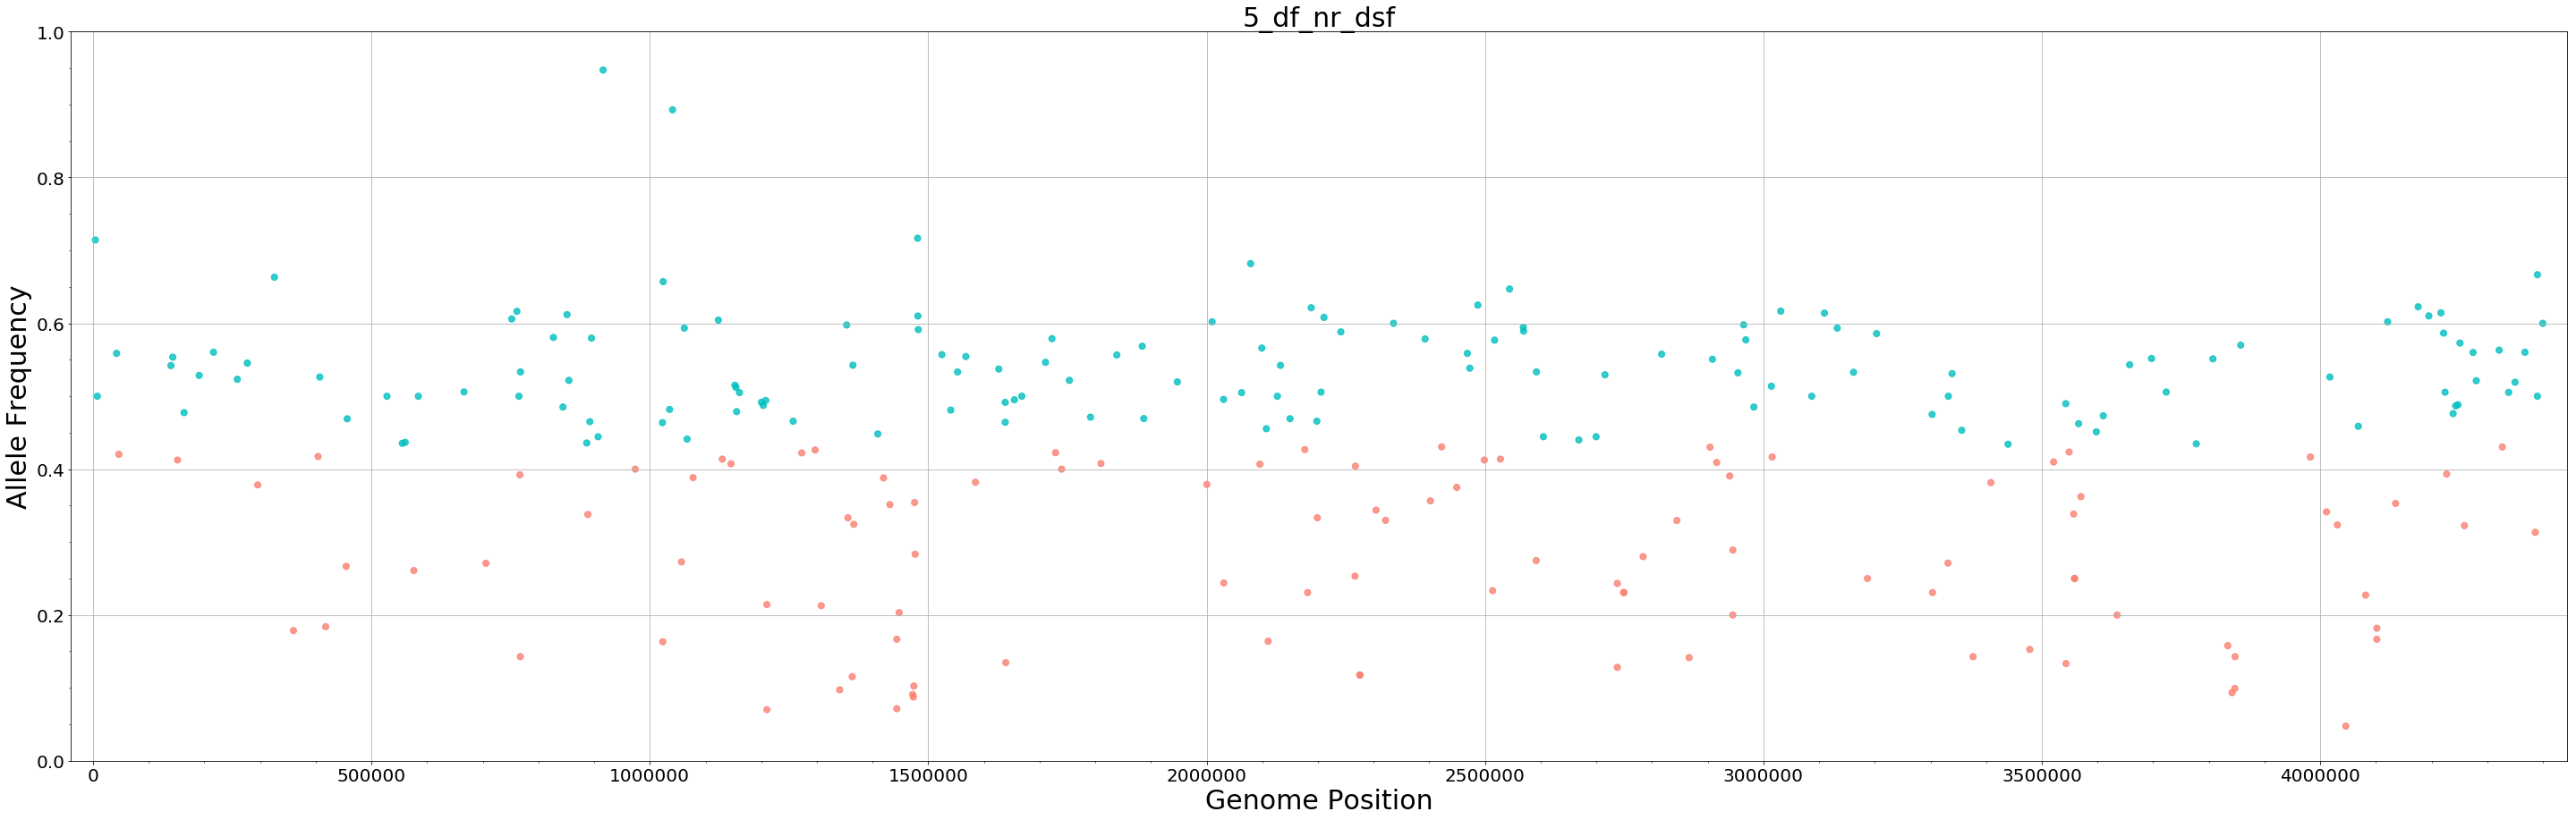

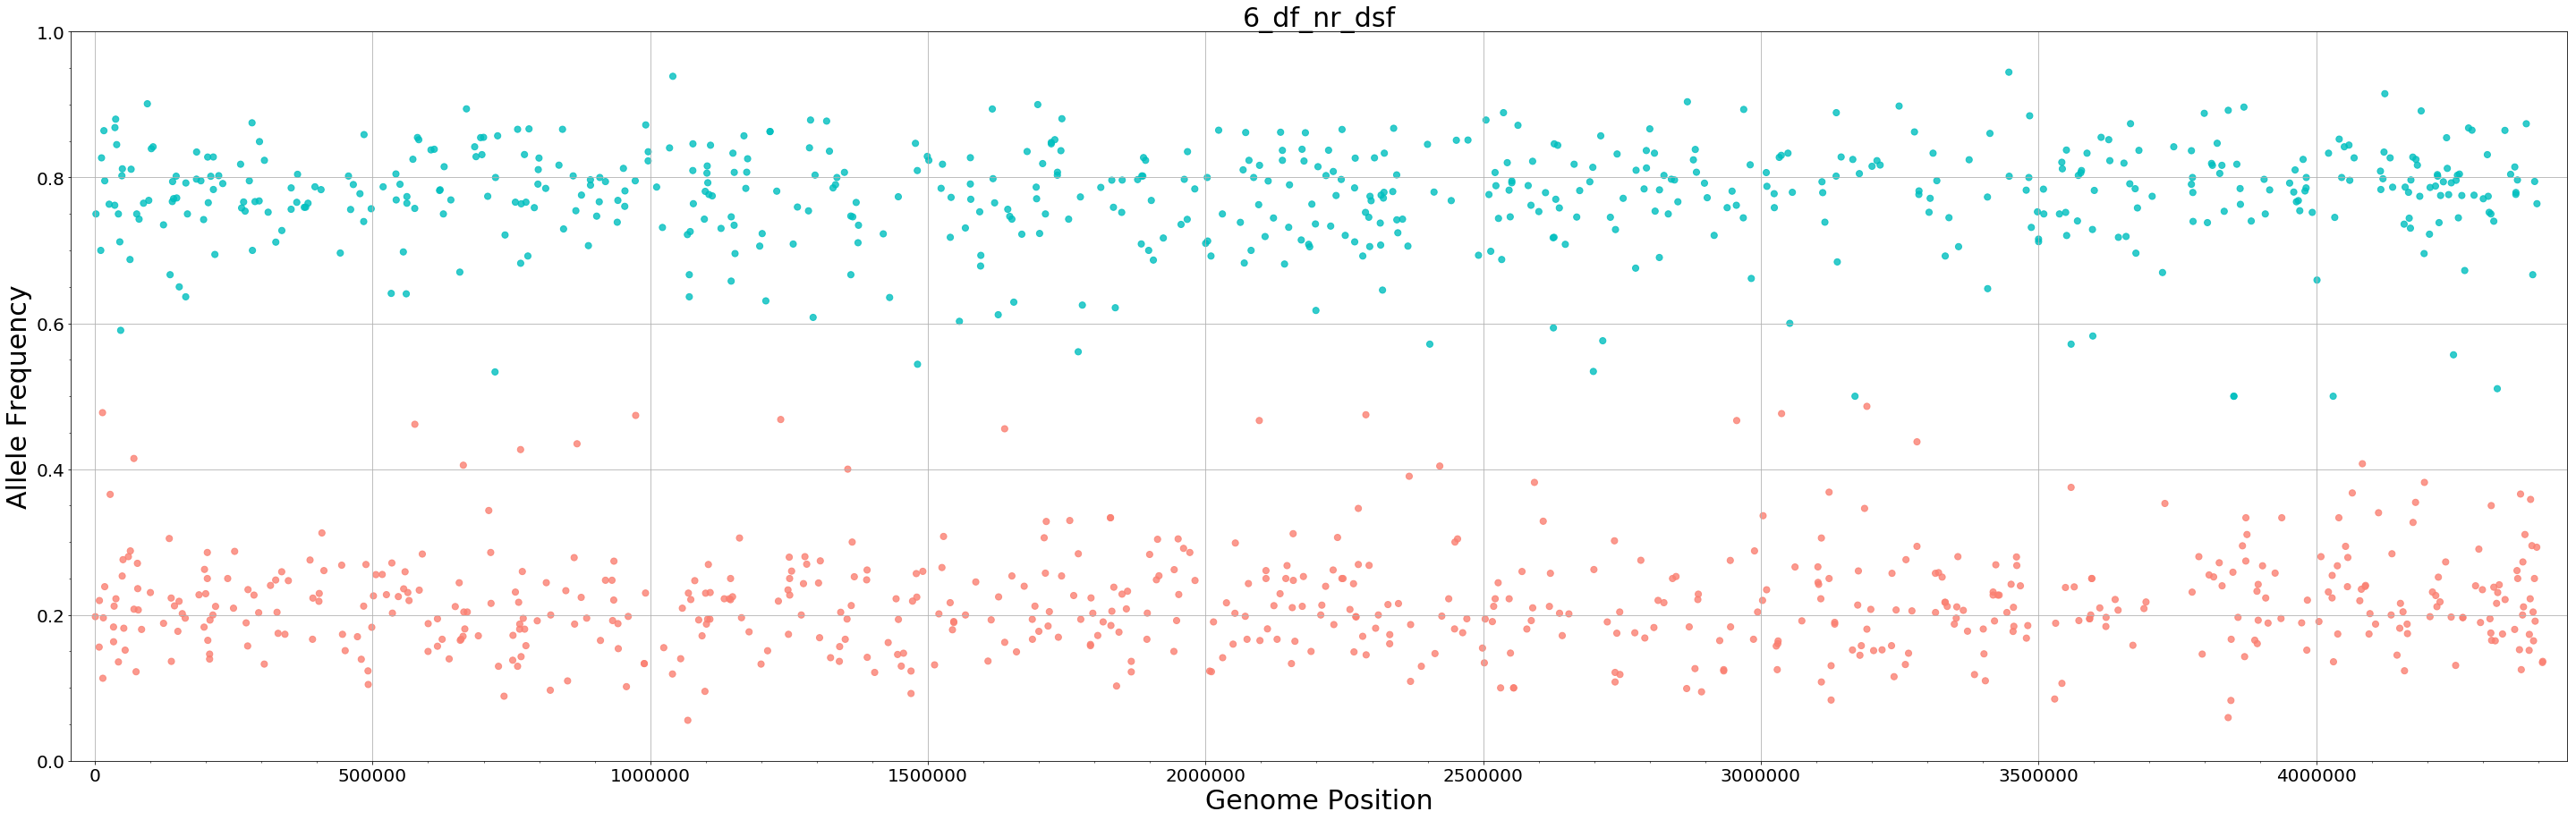

In [51]:
for name_dsf, df_dsf in dict_dsf.items():
    scatter_vcf_pos(df_dsf,name_dsf)

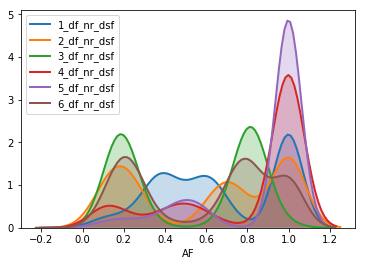

In [124]:
for name_dsf, df_dsf in dict_dsf.items():
    #print(name_dsf)
    x = df_dsf['AF']
    sns.distplot(x, hist=False, kde=True, rug=False, bins=20, kde_kws = {'shade': True, 'linewidth': 2}, label=name_dsf) #stacked=True

<Figure size 3600x1080 with 0 Axes>

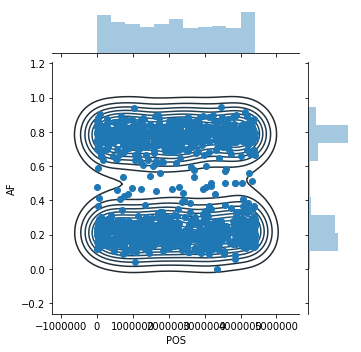

In [152]:
#x = dict_dsf["1_df_nr_dsf"]['AF']
plt.figure(figsize=(50,15))
sns.jointplot(x="POS", y="AF", data=dict_dsf["6_df_nr_dsf"][dict_dsf["6_df_nr_dsf"]['AF'] < 0.95], height=5).plot_joint(sns.kdeplot, zorder=0, n_levels=10)

<Figure size 3600x1080 with 0 Axes>

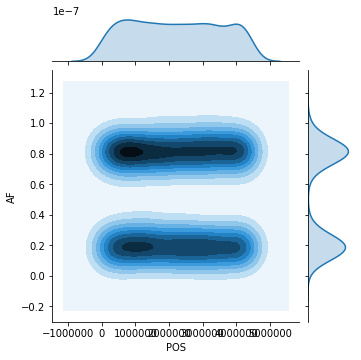

In [126]:
#x = dict_dsf["1_df_nr_dsf"]['AF']
plt.figure(figsize=(50,15))
sns.jointplot(x="POS", y="AF", data=dict_dsf["3_df_nr_dsf"], height=5, kind="kde")

In [30]:
#Function to draw distplot with seaborn
def distplot_sns(data_frame_vcf, name):
    x = data_frame_vcf['AF']
    sns.distplot(x, hist=True, kde=False, rug=False, bins=int(20), vertical=True)
    #plt.legend(prop={'size': 16}, title = name)
    plt.title(name)
    plt.ylabel('Allele Frequency')
    plt.xlabel('Density')
    plt.ylim(0, 1)
    plt.xlim(0, 800)
    #name_svg = name + "_den.svg"
    #name_png = name + "_den.png"
    #plt.grid(True)
    #plt.savefig(os.path.join('img', name_svg), format="svg")
    #plt.savefig(os.path.join('img', name_png), format="png")
    plt.show()

In [128]:
#sns.barplot(x="POS", y="AF", data=dict_dsf["3_df_nr_dsf"],
#            label="Total", color="b")

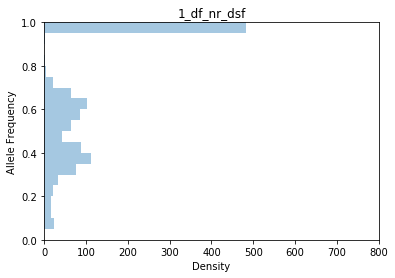

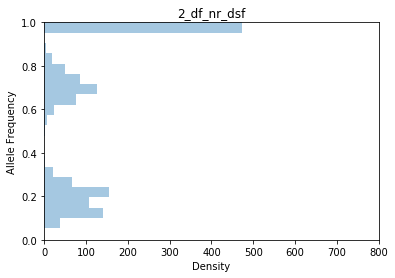

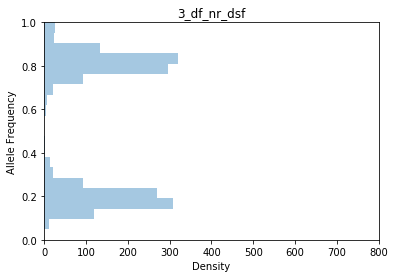

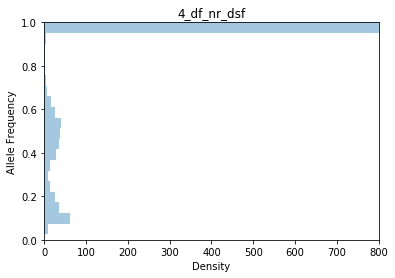

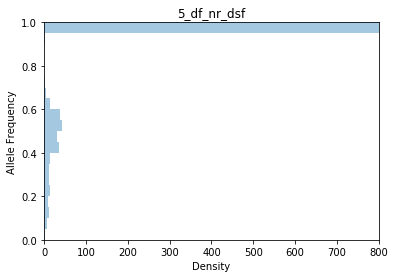

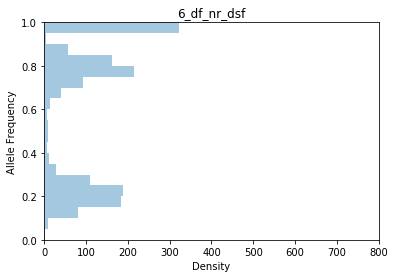

In [129]:
for name_dsf, df_dsf in dict_dsf.items():
    distplot_sns(df_dsf, name_dsf)

# Extract Population Frequency by Allele Frequency

In [31]:
def split_sample_freq(vcf_df, name):
    filter_homoz_top = 0.95
    filter_homoz_bottom = (1 - filter_homoz_top)
    mean = vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)].mean(axis = 0)
    top_positions = vcf_df[(vcf_df['AF'] > mean) & (vcf_df['AF'] < filter_homoz_top)]
    top_positions_mean = top_positions['AF'].mean(axis = 0)
    #bottom_positions = vcf_df[(vcf_df['AF'] < mean) & (vcf_df['AF'] > filter_homoz_bottom)]
    #bottom_positions_mean = bottom_positions['AF'].mean(axis = 0)
    bottom_positions_mean = 1 - top_positions_mean
    print("MIXED SAMPLE: %s: Pop. Freq 1: %.2g, Pop. Freq 2: %.2g" % (name, top_positions_mean, bottom_positions_mean))
    
    return #top_positions_mean, bottom_positions_mean

In [32]:
for name_dsf, df_dsf in dict_dsf.items():
    split_sample_freq(df_dsf, name_dsf)

MIXED SAMPLE: 1_df_nr_dsf: Pop. Freq 1: 0.6, Pop. Freq 2: 0.4
MIXED SAMPLE: 2_df_nr_dsf: Pop. Freq 1: 0.71, Pop. Freq 2: 0.29
MIXED SAMPLE: 3_df_nr_dsf: Pop. Freq 1: 0.81, Pop. Freq 2: 0.19
MIXED SAMPLE: 4_df_nr_dsf: Pop. Freq 1: 0.53, Pop. Freq 2: 0.47
MIXED SAMPLE: 5_df_nr_dsf: Pop. Freq 1: 0.54, Pop. Freq 2: 0.46
MIXED SAMPLE: 6_df_nr_dsf: Pop. Freq 1: 0.77, Pop. Freq 2: 0.23


In [48]:
##################################################################################################################

# Extract position by Allele Frequency

In [49]:
def split_df_mean(vcf_df):
    filter_homoz_top = 0.96
    filter_homoz_bottom = (1 - filter_homoz_top)
    
    mean = vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)].mean(axis = 0)    

    top_positions = vcf_df['POS'][(vcf_df['AF'] > mean) & (vcf_df['AF'] < filter_homoz_top)].tolist()
    bottom_positions = vcf_df['POS'][(vcf_df['AF'] < mean) & (vcf_df['AF'] > filter_homoz_bottom)].tolist()
    
    return top_positions, bottom_positions

[1849, 2532, 9143, 10464, 11820, 13460, 16119, 17657, 21819, 23174, 25610, 27469, 35608, 36008, 36538, 37305, 39158, 39758, 42227, 43945, 44768, 46324, 48503, 49360, 63146, 65150, 75233, 79480, 87468, 89200, 94388, 96894, 97696, 101539, 103600, 104712, 123454, 126803, 135329, 139297, 139850, 141623, 146236, 147262, 151798, 163467, 163706, 166565, 182824, 183091, 190816, 195360, 195682, 203038, 204094, 208322, 208590, 213147, 213281, 215977, 222925, 223752, 225668, 230170, 233358, 233364, 243598, 251669, 260282, 262268, 264129, 267751, 270430, 278021, 282892, 283610, 288260, 295731, 296312, 305188, 309765, 311889, 320180, 325703, 331588, 333212, 333292, 336546, 343281, 353309, 353365, 363464, 364854, 377014, 379528, 381030, 383716, 396199, 407167, 412280, 422745, 438271, 441823, 447442, 454333, 455325, 455329, 456594, 460413, 465300, 468357, 477234, 484005, 484596, 497491, 514657, 517411, 518987, 519185, 522081, 527316, 528354, 533547, 534427, 542014, 542514, 549363, 555366, 560615, 561

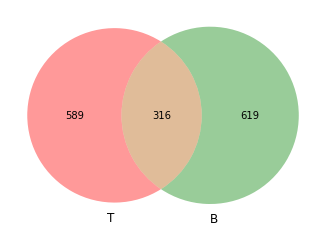

In [81]:
top_vcf,btm_vcf = split_df_mean_vcf(dict_dsf["6_df_nr_dsf"])
print(top_vcf)
print("#####################################################################################")
print(btm_vcf)
set_top_vcf = set(top_vcf)
set_btm_vcf = set(btm_vcf)
venn2([set_top_vcf, set_btm_vcf],  set_labels = ('T', 'B'))
plt.show()

In [50]:
"""
S_file = "data/SOMOZACOL2_S11_L001__final.bam.snp.final"
S_final = import_to_pandas(S_file)
S_pos = set(S_final.loc[:,0].tolist())
"""

'\nS_file = "data/SOMOZACOL2_S11_L001__final.bam.snp.final"\nS_final = import_to_pandas(S_file)\nS_pos = set(S_final.loc[:,0].tolist())\n'

In [51]:
dict_top_btm = {}
for name_dsf, df_dsf in dict_dsf.items():
    name = name_dsf.split("_")[0]
    name_dict = name + "_top_btm"
    name_top = name + "_top"
    name_btm = name + "_btm"
    name_top , name_btm = split_df_mean(df_dsf)
    dict_top_btm[name_dict] = name_top , name_btm


In [52]:
for key, value in dict_top_btm.items():
    print(key, ":",len(value[0]), len(value[1]))

1_top_btm : 374 395
2_top_btm : 390 526
3_top_btm : 894 824
4_top_btm : 199 162
5_top_btm : 146 108
6_top_btm : 589 619


In [53]:
#Ven diagram with all (non exclusive snps in SOMOZA)
# P50 - 17171479
# P80 - 17160843
# P90 - 17152627
"""
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.title("SOMOZA vs MIX 17160843")
v3 = venn3([top_P180_set, btm_P180_set, S_pos], set_labels = ('TOP', 'BTM', 'SOMOZA'))

plt.subplot(1, 3, 2)
plt.title("SOMOZA vs MIX 17152627")
v = venn3([top_P190_set, btm_P190_set, S_pos], set_labels = ('TOP', 'BTM', 'SOMOZA'), )
#c = venn3_circles([top_P190_set, btm_P190_set, B_exclusive], linestyle='dashed', linewidth=1, color="grey")

plt.subplot(1, 3, 3)
plt.title("SOMOZA vs MIX")
v2 = venn3([top_P150_set, btm_P150_set, S_pos], set_labels = ('TOP', 'BTM', 'SOMOZA'))

plt.suptitle('SOMOZA', fontsize=16, verticalalignment='bottom')

plt.savefig(os.path.join('img', 'SOMOZA_ALL.svg'), format="svg")
#plt.show()
"""

'\nplt.figure(figsize=(20,5))\n\nplt.subplot(1, 3, 1)\nplt.title("SOMOZA vs MIX 17160843")\nv3 = venn3([top_P180_set, btm_P180_set, S_pos], set_labels = (\'TOP\', \'BTM\', \'SOMOZA\'))\n\nplt.subplot(1, 3, 2)\nplt.title("SOMOZA vs MIX 17152627")\nv = venn3([top_P190_set, btm_P190_set, S_pos], set_labels = (\'TOP\', \'BTM\', \'SOMOZA\'), )\n#c = venn3_circles([top_P190_set, btm_P190_set, B_exclusive], linestyle=\'dashed\', linewidth=1, color="grey")\n\nplt.subplot(1, 3, 3)\nplt.title("SOMOZA vs MIX")\nv2 = venn3([top_P150_set, btm_P150_set, S_pos], set_labels = (\'TOP\', \'BTM\', \'SOMOZA\'))\n\nplt.suptitle(\'SOMOZA\', fontsize=16, verticalalignment=\'bottom\')\n\nplt.savefig(os.path.join(\'img\', \'SOMOZA_ALL.svg\'), format="svg")\n#plt.show()\n'

In [54]:
def split_df_mean_todict(vcf_df):
    
    filter_homoz_top = 0.99
    filter_homoz_bottom = (1 - filter_homoz_top)
    
    mean = vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)].mean(axis = 0)
    
    top_positions_df = vcf_df[(vcf_df['AF'] > mean) & (vcf_df['AF'] < filter_homoz_top)]
    bottom_positions_df = vcf_df[(vcf_df['AF'] < mean) & (vcf_df['AF'] > filter_homoz_bottom)]
    
    top_positions_dict = top_positions_df.set_index('POS')['ALT'].to_dict()
    bottom_positions_dict = bottom_positions_df.set_index('POS')['ALT'].to_dict()

    return top_positions_dict, bottom_positions_dict

In [55]:
dict_allpos_dict = {}
for name_dsf, df_dsf in dict_dsf.items():
    dict_allpos_dict[name_dsf] = df_dsf.set_index('POS')['ALT'].to_dict()

# Find Lineage

In [56]:
for name_dsf, dict_dsf_df in dict_allpos_dict.items():
    print(name_dsf)
    get_lineage_coll(dict_dsf_df)

1_df_nr_dsf
This samples belongs to linage 4
2_df_nr_dsf
This samples belongs to linage 4
3_df_nr_dsf
This samples belongs to linage 4
4_df_nr_dsf
This samples belongs to linage 2.2.1
5_df_nr_dsf
This samples belongs to linage 2.2.1
6_df_nr_dsf
This samples belongs to linage 4


In [57]:
for name_dsf, dict_dsf_df in dict_allpos_dict.items():
    print(name_dsf)
    #print(dict_dsf_df)
    get_lineage_snp(dict_dsf_df)

1_df_nr_dsf
This strain has those lineage positions:
: 4.2.2
: 4.2

2_df_nr_dsf
This strain has those lineage positions:
: 4.1
: 4.1.2.1
: 4.3
: 4.1.2
: 4.3.4.2
: 4.3.4

3_df_nr_dsf
This strain has those lineage positions:
: 4.4.1.1
: 1
: 1.2.2
: 4.4.1
: 4.4

4_df_nr_dsf
This strain has those lineage positions:
: 2
: 2.2.1
: 2.2

5_df_nr_dsf
This strain has those lineage positions:
: 2
: 2.2.1
: 2.2

6_df_nr_dsf
This strain has those lineage positions:
: 4.3.3
: 2
: 4.3
: 2.2.1
: 2.2



In [58]:
dict_dtop_dbtm = {}
for name_dsf, df_dsf in dict_dsf.items():
    name = name_dsf.split("_")[0]
    print(name_dsf)
    name_top = name + "_dtop"
    name_btm = name + "_dbtm"
    
    dict_dtop_dbtm[name_top] = split_df_mean_todict(df_dsf)[0]
    dict_dtop_dbtm[name_btm] = split_df_mean_todict(df_dsf)[1]

1_df_nr_dsf
2_df_nr_dsf
3_df_nr_dsf
4_df_nr_dsf
5_df_nr_dsf
6_df_nr_dsf


In [59]:
for name_dict, dict_value in dict_dtop_dbtm.items():
    print(name_dict)
    get_lineage_snp(dict_value)

1_dtop
No lineage were found

1_dbtm
This strain has those lineage positions:
: 4.2.2
: 4.2

2_dtop
This strain has those lineage positions:
: 4.3
: 4.3.4.2
: 4.3.4

2_dbtm
This strain has those lineage positions:
: 4.1
: 4.1.2.1
: 4.1.2

3_dtop
This strain has those lineage positions:
: 1
: 1.2.2

3_dbtm
This strain has those lineage positions:
: 4.4.1.1
: 4.4.1
: 4.4

4_dtop
No lineage were found

4_dbtm
No lineage were found

5_dtop
No lineage were found

5_dbtm
No lineage were found

6_dtop
This strain has those lineage positions:
: 2
: 2.2.1
: 2.2

6_dbtm
This strain has those lineage positions:
: 4.3.3
: 4.3



# Find resistance in filtered samples

In [60]:
for name_dsf, dict_dsf_df in dict_allpos_dict.items():
    print(name_dsf)
    get_resistance_snp(dict_dsf_df)

1_df_nr_dsf
No resistance were found

2_df_nr_dsf
No resistance were found

3_df_nr_dsf
This strain has resistance positions:
:761155:*:rifampicin (RMP)
:781687:*:streptomycin (SM)
:1417019:ethambutol_(EMB)
:2155168:*:isoniazid (INH)
:4245969:ethambutol_(EMB)
:4247431:*:ethambutol (EMB)

4_df_nr_dsf
This strain has resistance positions:
:761155:*:rifampicin (RMP)
:781687:*:streptomycin (SM)
:781822:*:streptomycin (SM)
:1673425:*:isoniazid (INH)
:2155168:*:isoniazid (INH)
:4243221:ethambutol (EMB)
:4247429:*:ethambutol (EMB)

5_df_nr_dsf
This strain has resistance positions:
:7582:*:fluoroquinolones (FQ)
:761155:*:rifampicin (RMP)
:781687:*:streptomycin (SM)
:2155168:*:isoniazid (INH)
:2289208:pyrazinamide (PZA)
:4243225:ethambutol (EMB)
:4247429:*:ethambutol (EMB)

6_df_nr_dsf
This strain has resistance positions:
:7572:*:fluoroquinolones (FQ)
:412339:ethambutol_(EMB)
:761110:*:rifampicin (RMP)
:761155:*:rifampicin (RMP)
:781687:*:streptomycin (SM)
:1472359:streptomycin (SM)
:1473246:*

In [61]:
for name_dict, dict_value in dict_dtop_dbtm.items():
    print(name_dict)
    get_resistance_snp(dict_value)

1_dtop
No resistance were found

1_dbtm
No resistance were found

2_dtop
No resistance were found

2_dbtm
No resistance were found

3_dtop
This strain has resistance positions:
:1417019:ethambutol_(EMB)
:4245969:ethambutol_(EMB)

3_dbtm
This strain has resistance positions:
:761155:*:rifampicin (RMP)
:781687:*:streptomycin (SM)
:2155168:*:isoniazid (INH)
:4247431:*:ethambutol (EMB)

4_dtop
This strain has resistance positions:
:781687:*:streptomycin (SM)
:781822:*:streptomycin (SM)
:1673425:*:isoniazid (INH)
:4247429:*:ethambutol (EMB)

4_dbtm
This strain has resistance positions:
:4243221:ethambutol (EMB)

5_dtop
No resistance were found

5_dbtm
This strain has resistance positions:
:7582:*:fluoroquinolones (FQ)
:4243225:ethambutol (EMB)
:4247429:*:ethambutol (EMB)

6_dtop
This strain has resistance positions:
:761155:*:rifampicin (RMP)
:781687:*:streptomycin (SM)
:1473246:*:amikacin (AMK) kanamycin (KAN) capreomycin (CPR)
:4247429:*:ethambutol (EMB)

6_dbtm
This strain has resistance

In [62]:
strepto = [781687,781822]
dict_df["4_df"][dict_df["4_df"]['POS'].isin(strepto)]

#CHROM     POS ID REF ALT    QUAL FILTER  \
323  MTB_anc  781687  .   A   G  1510.6   PASS   
324  MTB_anc  781822  .   A   G  2043.6   PASS   

                                                  INFO          FORMAT  \
323  AC=1;AF=0.500;AN=2;BaseQRankSum=-4.450e-01;DP=...  GT:AD:DP:GQ:PL   
324  AC=1;AF=0.500;AN=2;BaseQRankSum=0.095;DP=136;E...  GT:AD:DP:GQ:PL   

                           sample  ...  MQRankSum  ReadPosRankSum  PGT  PID  \
323  0/1:69,60:130:99:1518,0,1851  ...        0.0           0.511  NaN  NaN   
324  0/1:60,76:136:99:2051,0,1560  ...        0.0          -0.265  NaN  NaN   

      PS  REF_AD  ALT_AD        aF        AF  Is_repeat  
323  NaN    69.0    60.0  0.530769  0.461538      False  
324  NaN    60.0    76.0  0.441176  0.558824      False  

[2 rows x 36 columns]

In [63]:
dict_dtop_dbtm_list = {}
for name_dsf, df_dsf in dict_dsf.items():
    name = name_dsf.split("_")[0]
    name_top = name + "_vcf_top.vcf"
    name_btm = name + "_vcf_btm.vcf"
    
    dict_dtop_dbtm_list[name_top] = split_df_mean(df_dsf)[0]
    dict_dtop_dbtm_list[name_btm] = split_df_mean(df_dsf)[1]

# Finid resistance in non filtered dataset

In [64]:
for k,v in dict_df.items():
    print(k)

1_df
2_df
3_df
4_df
5_df
6_df


In [71]:
check_positions = [761155, 2155168]

In [72]:
dict_df["3_df"][dict_df["3_df"]['POS'].isin(check_positions)]

#CHROM      POS ID REF ALT   QUAL FILTER  \
484   MTB_anc   761155  .   C   T  424.6   PASS   
1254  MTB_anc  2155168  .   C   G  392.6   PASS   

                                                   INFO          FORMAT  \
484   AC=1;AF=0.500;AN=2;BaseQRankSum=1.02;DP=118;Ex...  GT:AD:DP:GQ:PL   
1254  AC=1;AF=0.500;AN=2;BaseQRankSum=0.891;DP=135;E...  GT:AD:DP:GQ:PL   

                            sample  ...    GQ          PL  PGT  PID   PS  \
484    0/1:95,23:118:99:432,0,2709  ...  99.0  432,0,2709  NaN  NaN  NaN   
1254  0/1:110,25:135:99:400,0,2960  ...  99.0  400,0,2960  NaN  NaN  NaN   

      REF_AD  ALT_AD        aF        AF  Is_repeat  
484     95.0    23.0  0.805085  0.194915      False  
1254   110.0    25.0  0.814815  0.185185      False  

[2 rows x 36 columns]

In [66]:
dict_allpos_dict_u = {}
for name_df, df_df in dict_df.items():
    dict_allpos_dict_u[name_df] = df_df.set_index('POS')['ALT'].to_dict()

In [67]:
for name_df, dict_df_df in dict_allpos_dict_u.items():
    print(name_df)
    get_resistance_snp(dict_df_df)

1_df
This strain has resistance positions:
:1473329:*:amikacin (AMK) kanamycin (KAN) capreomycin (CPR)

2_df
No resistance were found

3_df
This strain has resistance positions:
:761155:*:rifampicin (RMP)
:781687:*:streptomycin (SM)
:1417019:ethambutol_(EMB)
:2155168:*:isoniazid (INH)
:4245969:ethambutol_(EMB)
:4247431:*:ethambutol (EMB)

4_df
This strain has resistance positions:
:761155:*:rifampicin (RMP)
:781687:*:streptomycin (SM)
:781822:*:streptomycin (SM)
:1673425:*:isoniazid (INH)
:2155168:*:isoniazid (INH)
:4243221:ethambutol (EMB)
:4247429:*:ethambutol (EMB)
:4247513:ethambutol (EMB)

5_df
This strain has resistance positions:
:7582:*:fluoroquinolones (FQ)
:761155:*:rifampicin (RMP)
:781687:*:streptomycin (SM)
:2155168:*:isoniazid (INH)
:2289208:pyrazinamide (PZA)
:4243225:ethambutol (EMB)
:4247429:*:ethambutol (EMB)

6_df
This strain has resistance positions:
:7572:*:fluoroquinolones (FQ)
:7582:*:fluoroquinolones (FQ)
:412339:ethambutol_(EMB)
:761110:*:rifampicin (RMP)
:7611

In [68]:
dict_dtop_dbtm_u = {}
for name_df, df_df in dict_df.items():
    name = name_df.split("_")[0]
    print(name_df)
    name_top = name + "_u_dtop"
    name_btm = name + "_u_dbtm"
    
    dict_dtop_dbtm_u[name_top] = split_df_mean_todict(df_df)[0]
    dict_dtop_dbtm_u[name_btm] = split_df_mean_todict(df_df)[1]

1_df
2_df
3_df
4_df
5_df
6_df


In [69]:
for name_dict, dict_value in dict_dtop_dbtm_u.items():
    print(name_dict)
    get_resistance_snp(dict_value)

1_u_dtop
No resistance were found

1_u_dbtm
This strain has resistance positions:
:1473329:*:amikacin (AMK) kanamycin (KAN) capreomycin (CPR)

2_u_dtop
No resistance were found

2_u_dbtm
No resistance were found

3_u_dtop
This strain has resistance positions:
:1417019:ethambutol_(EMB)
:4245969:ethambutol_(EMB)

3_u_dbtm
This strain has resistance positions:
:761155:*:rifampicin (RMP)
:781687:*:streptomycin (SM)
:2155168:*:isoniazid (INH)
:4247431:*:ethambutol (EMB)

4_u_dtop
This strain has resistance positions:
:781687:*:streptomycin (SM)
:781822:*:streptomycin (SM)
:1673425:*:isoniazid (INH)
:4243221:ethambutol (EMB)
:4247429:*:ethambutol (EMB)
:4247513:ethambutol (EMB)

4_u_dbtm
No resistance were found

5_u_dtop
This strain has resistance positions:
:7582:*:fluoroquinolones (FQ)
:4243225:ethambutol (EMB)
:4247429:*:ethambutol (EMB)

5_u_dbtm
No resistance were found

6_u_dtop
This strain has resistance positions:
:7582:*:fluoroquinolones (FQ)
:761155:*:rifampicin (RMP)
:781687:*:st

# Obtain VCF files

In [65]:
def split_df_mean_vcf(vcf_df):
    filter_homoz_top = 0.96
    filter_homoz_bottom = (1 - filter_homoz_top)
    #print("VCF:" , vcf_df.shape)
    mean = vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)].mean(axis = 0)    

    top_positions_vcf = vcf_df['POS'][(vcf_df['AF'] > mean) & (vcf_df['FILTER'] == "PASS")].tolist()
    bottom_positions_vcf = vcf_df['POS'][(((vcf_df['AF'] < mean) & (vcf_df['AF'] > filter_homoz_bottom)) | (vcf_df['AF'] > filter_homoz_top)) & (vcf_df['FILTER'] == "PASS")].tolist()
    #print(len(top_positions_vcf))
    #print(len(bottom_positions_vcf))
    return top_positions_vcf, bottom_positions_vcf

In [66]:
def filter_vcf_list(raw_vcf, list_pos, name_out):
    input_vcf = os.path.abspath(raw_vcf)
    rinput_vcf_dir_name = ("/").join(input_vcf.split("/")[:-1])
     
    vcf_output_file = os.path.join(rinput_vcf_dir_name, name_out)
        
    with open(input_vcf, "r") as f:
        with open(vcf_output_file, "w") as f1:
            for line in f:
                if line.startswith("#CHROM") and not line.startswith("##"):
                    #print(line)
                    f1.write(line)
                elif not line.startswith("##")and int(line.split("\t")[1]) in list_pos:
                    #print(line)
                    f1.write(line)

In [35]:
test_pass = dict_df["4_df"][(dict_df["4_df"]['AF'] > 0.5) & (dict_df["4_df"]['FILTER'] == "PASS")].head()

In [36]:
test_pass[test_pass['FILTER'] != "PASS"]

Empty DataFrame
Columns: [#CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT, sample, AC, af, AN, DP, ExcessHet, FS, MLEAC, MLEAF, MQ, QD, SOR, GT, AD, GQ, PL, BaseQRankSum, MQRankSum, ReadPosRankSum, PGT, PID, PS, REF_AD, ALT_AD, aF, AF, Is_repeat]
Index: []

[0 rows x 36 columns]

In [37]:
test_pass = dict_df["3_df"][(dict_df["3_df"]['AF'] > 0.5) & (dict_df["4_df"]['FILTER'] == "PASS")].head()

In [38]:
test_pass[test_pass['FILTER'] != "PASS"]

Empty DataFrame
Columns: [#CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT, sample, AC, af, AN, BaseQRankSum, DP, ExcessHet, FS, MLEAC, MLEAF, MQ, MQRankSum, QD, ReadPosRankSum, SOR, GT, AD, GQ, PL, PGT, PID, PS, REF_AD, ALT_AD, aF, AF, Is_repeat]
Index: []

[0 rows x 36 columns]

In [ ]:
dict_dtop_dbtm_list_vcf

In [67]:
dict_dtop_dbtm_list_vcf = {}
for name_vcf, df_vcf in dict_dsf.items():
    name = name_vcf.split("_")[0]
    name_top = name + "_vcf_top.vcf"
    name_btm = name + "_vcf_btm.vcf"
    #print(name, df_vcf.shape)
    dict_dtop_dbtm_list_vcf[name_top] = split_df_mean_vcf(df_vcf)[0]
    dict_dtop_dbtm_list_vcf[name_btm] = split_df_mean_vcf(df_vcf)[1]

In [68]:
for n, d in dict_dsf.items():
    print(i, d.shape)

6_df_nr_dsf (1251, 38)
6_df_nr_dsf (1385, 38)
6_df_nr_dsf (1744, 38)
6_df_nr_dsf (1178, 38)
6_df_nr_dsf (1080, 38)
6_df_nr_dsf (1525, 38)


In [233]:
#vcf_files = [vcf_1, vcf_2, vcf_3, vcf_4, vcf_5, vcf_6]
for vcf_name, list_pos in dict_dtop_dbtm_list.items():
    for file in vcf_files:
        file_split = file.split("/")[1][0] + "_" + file.split("/")[1][-3:]
        if vcf_name.startswith(file_split):
            print(file, len(list_pos), vcf_name)
            filter_vcf_list(file, list_pos, vcf_name)

test/1mixed.snp.hf.vcf 374 1_vcf_top.vcf
test/1mixed.snp.hf.vcf 395 1_vcf_btm.vcf
test/2mixed.snp.hf.vcf 390 2_vcf_top.vcf
test/2mixed.snp.hf.vcf 526 2_vcf_btm.vcf
test/3mixed.snp.hf.vcf 894 3_vcf_top.vcf
test/3mixed.snp.hf.vcf 824 3_vcf_btm.vcf
test/4mixed.snp.hf.vcf 199 4_vcf_top.vcf
test/4mixed.snp.hf.vcf 162 4_vcf_btm.vcf
test/5mixed.snp.hf.vcf 146 5_vcf_top.vcf
test/5mixed.snp.hf.vcf 108 5_vcf_btm.vcf
test/6mixed.snp.hf.vcf 589 6_vcf_top.vcf
test/6mixed.snp.hf.vcf 619 6_vcf_btm.vcf


In [69]:
for name, list_ in dict_dtop_dbtm_list_vcf.items():
    print(name, len(list_))

1_vcf_top.vcf 844
1_vcf_btm.vcf 795
2_vcf_top.vcf 853
2_vcf_btm.vcf 811
3_vcf_top.vcf 917
3_vcf_btm.vcf 702
4_vcf_top.vcf 986
4_vcf_btm.vcf 849
5_vcf_top.vcf 957
5_vcf_btm.vcf 876
6_vcf_top.vcf 890
6_vcf_btm.vcf 805


In [70]:
#vcf_files = [vcf_1, vcf_2, vcf_3, vcf_4, vcf_5, vcf_6]
for vcf_name, list_pos in dict_dtop_dbtm_list_vcf.items():
    for file in vcf_files:
        file_split = file.split("/")[1][0] + "_" + file.split("/")[1][-3:]
        #print(file_split)
        if vcf_name.startswith(file_split):
            #print(file, len(list_pos), vcf_name)
            filter_vcf_list(file, list_pos, vcf_name)